In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

Unnamed: 0  Latitude  Longitude    District  Mandal      Village  \
3041        3044     18.40      84.12  Srikakulam  Polaki  Ambeerupeta   
3042        3045     18.40      84.12  Srikakulam  Polaki  Ambeerupeta   
3043        3046     18.39      84.12  Srikakulam  Polaki  Ambeerupeta   
3044        3047     18.40      84.11  Srikakulam  Polaki  Ambeerupeta   
3045        3048     18.39      84.12  Srikakulam  Polaki  Ambeerupeta   

        SoilType    pH    EC    OC  ...     B     Fe    Cu     Mn      NDVI  \
3041  Black soil  6.12  0.77  0.96  ...  1.30  53.30  5.31  44.57  0.033310   
3042  Black soil  7.55  0.15  0.53  ...  0.67  60.11  3.33  16.73  0.033310   
3043  Black soil  6.85  4.60  0.57  ...  2.19  23.86  2.98  25.16  0.029043   
3044  Black soil  8.25  1.46  0.57  ...  1.30   9.95  2.21   7.01  0.033558   
3045  Black soil  6.70  0.69  0.63  ...  0.55  70.84  3.23  20.62  0.029043   

          ARVI       EVI       GCI      NDWI          Crop  
3041  0.031792  0.243958  0.102674 -0.048830  Paddy/G.gram  
3042  0.031792  0.243958  0.102674 -0.048830  Paddy/G.gram  
3043  0.032842  0.408615  0.098536 -0.046955  Paddy/G.gram  
3044  0.018142  0.197793  0.104857 -0.049817  Paddy/G.gram  
3045  0.032842  0.408615  0.098536 -0.046955  Paddy/G.gram  

[5 rows x 26 columns]

In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

pH          EC          OC           P            K  \
count  428.000000  428.000000  428.000000  428.000000   428.000000   
mean     6.961472    0.413271    0.463808   14.602640   152.665888   
std      1.173631    0.731511    0.252160   23.214154   172.273904   
min      4.740000    0.020000    0.060000    0.450000    16.000000   
25%      5.942500    0.130000    0.277500    4.760000    67.000000   
50%      6.965000    0.210000    0.420000    9.935000   107.500000   
75%      8.080000    0.392500    0.602500   17.795000   178.250000   
max      9.040000    9.250000    2.260000  361.940000  2009.000000   

                Ca           Mg           S          Zn           B  \
count   428.000000   428.000000  428.000000  428.000000  428.000000   
mean   1030.453271   356.135514   32.028154    1.252827    0.981846   
std     713.591398   281.083851   72.268100    1.357158    0.624377   
min      46.000000     4.000000    0.100000    0.100000    0.100000   
25%     617.000000   167.250000    6.220000    0.600000    0.527500   
50%     892.500000   283.000000   11.345000    0.900000    0.840000   
75%    1192.000000   456.250000   21.610000    1.500000    1.322500   
max    5411.000000  1956.000000  648.540000   21.140000    3.660000   

               Fe          Cu          Mn        NDVI  
count  428.000000  428.000000  428.000000  428.000000  
mean    54.822523    2.310654   26.856519    0.146111  
std     57.255940    1.509037   21.778706    0.184778  
min      2.580000    0.110000    1.650000    0.005054  
25%      9.942500    1.180000   12.920000    0.030733  
50%     33.730000    1.970000   20.060000    0.040650  
75%     84.330000    3.132500   33.885000    0.191484  
max    346.180000    9.520000  207.680000    0.803907

In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 279,
 'Black Soil': 79,
 'Sandy Loam Soil': 58,
 'Saline Soil': 10,
 'Red Sandy Soil': 2}

<BarContainer object of 5 artists>

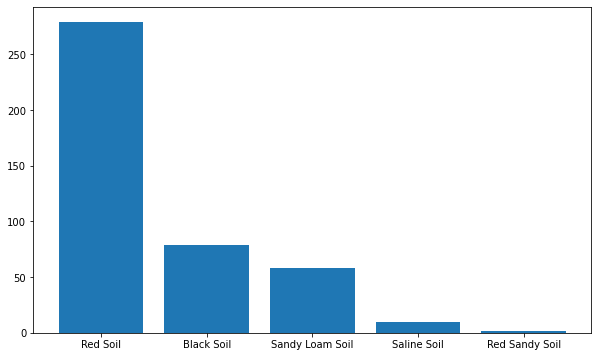

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               50
Maize               38
Coconut             35
banana/coconut      34
Cashew              20
Banana/coconut      17
Banana              11
Maize/paddy          7
paddy                7
Paddy/G.nut          5
maize                5
Paddy Maize          4
banana               3
Cotton/Maize         3
Paddy/Ragi           3
Paddy/Maize          2
cashew               1
Maize/Horti          1
coconut/banana       1
Paddy Sugercane      1
Chilli Papaya        1
paddy                1
coconut              1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 67
Banana + Coconut      52
Maize                 47
Coconut               36
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

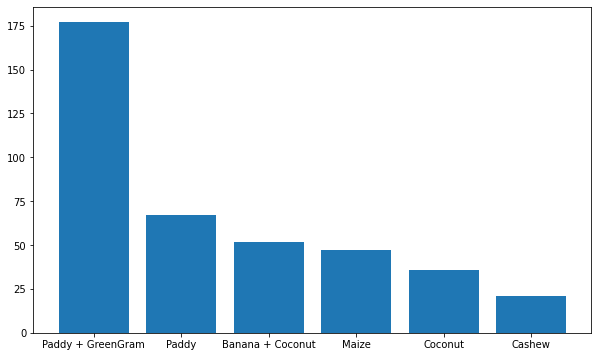

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

pH        EC        OC         P         K        Ca        Mg  \
pH    1.000000  0.036144 -0.173142  0.147631  0.212099  0.088177  0.248197   
EC    0.036144  1.000000  0.294264  0.103024  0.281155  0.277983  0.345899   
OC   -0.173142  0.294264  1.000000  0.428003  0.485155  0.535371  0.427264   
P     0.147631  0.103024  0.428003  1.000000  0.646969  0.158760  0.049023   
K     0.212099  0.281155  0.485155  0.646969  1.000000  0.335424  0.288572   
Ca    0.088177  0.277983  0.535371  0.158760  0.335424  1.000000  0.853234   
Mg    0.248197  0.345899  0.427264  0.049023  0.288572  0.853234  1.000000   
S     0.004609  0.760315  0.247478  0.068294  0.191091  0.200946  0.227618   
Zn    0.056296  0.079011  0.505206  0.582799  0.403726  0.197035  0.053939   
B     0.388219  0.392242  0.471484  0.225287  0.426516  0.357904  0.596317   
Fe   -0.699983 -0.047530  0.384226  0.003291 -0.102368  0.143338 -0.014557   
Cu   -0.374378  0.174227  0.686953  0.053457  0.157180  0.598291  0.511157   
Mn   -0.355627 -0.070442  0.236073 -0.047088 -0.012947  0.133805  0.027572   
NDVI  0.193862 -0.132072 -0.004538  0.174212  0.106392 -0.066031 -0.024133   

             S        Zn         B        Fe        Cu        Mn      NDVI  
pH    0.004609  0.056296  0.388219 -0.699983 -0.374378 -0.355627  0.193862  
EC    0.760315  0.079011  0.392242 -0.047530  0.174227 -0.070442 -0.132072  
OC    0.247478  0.505206  0.471484  0.384226  0.686953  0.236073 -0.004538  
P     0.068294  0.582799  0.225287  0.003291  0.053457 -0.047088  0.174212  
K     0.191091  0.403726  0.426516 -0.102368  0.157180 -0.012947  0.106392  
Ca    0.200946  0.197035  0.357904  0.143338  0.598291  0.133805 -0.066031  
Mg    0.227618  0.053939  0.596317 -0.014557  0.511157  0.027572 -0.024133  
S     1.000000  0.034358  0.418827  0.036341  0.165831 -0.080504 -0.151143  
Zn    0.034358  1.000000  0.136258  0.099621  0.169182  0.158456  0.287877  
B     0.418827  0.136258  1.000000 -0.146109  0.348940 -0.120227  0.057446  
Fe    0.036341  0.099621 -0.146109  1.000000  0.637164  0.348255 -0.081870  
Cu    0.165831  0.169182  0.348940  0.637164  1.000000  0.372942 -0.099035  
Mn   -0.080504  0.158456 -0.120227  0.348255  0.372942  1.000000  0.191194  
NDVI -0.151143  0.287877  0.057446 -0.081870 -0.099035  0.191194  1.000000

In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)


Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'NDVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe     Mn     NDVI  Black Soil  \
3041  6.12  0.77  0.96  5.62  53.3  44.57  0.03331           1   

      Red Sandy Soil  Red Soil  Saline Soil  Sandy Loam Soil  
3041               0         0            0                0  
3041    Paddy + GreenGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.67


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.67 %
Standard Deviation: 5.43 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.71


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.33 %
Standard Deviation: 10.57 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.33 %
Standard Deviation: 6.63 %


In [36]:
pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state = 0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.72


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.00 %
Standard Deviation: 5.33 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.82
Testing Accuracy:  0.76


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.00 %
Standard Deviation: 7.33 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.1093895	total: 149ms	remaining: 14.7s
1:	learn: 0.9494452	total: 150ms	remaining: 7.33s
2:	learn: 0.8809131	total: 150ms	remaining: 4.86s
3:	learn: 0.8177794	total: 151ms	remaining: 3.62s
4:	learn: 0.7840319	total: 152ms	remaining: 2.88s
5:	learn: 0.7292687	total: 152ms	remaining: 2.39s
6:	learn: 0.7167746	total: 153ms	remaining: 2.03s
7:	learn: 0.7007868	total: 154ms	remaining: 1.77s
8:	learn: 0.6863879	total: 155ms	remaining: 1.56s
9:	learn: 0.6668952	total: 155ms	remaining: 1.4s
10:	learn: 0.6317379	total: 156ms	remaining: 1.26s
11:	learn: 0.6237217	total: 157ms	remaining: 1.15s
12:	learn: 0.6126015	total: 157ms	remaining: 1.05s
13:	learn: 0.5990073	total: 158ms	remaining: 972ms
14:	learn: 0.5734910	total: 159ms	remaining: 900ms
15:	learn: 0.5636826	total: 160ms	remaining: 838ms
16:	learn: 0.5380545	total: 160ms	remaining: 783ms
17:	learn: 0.5244874	total: 161ms	remaining: 734ms
18:	learn: 0.5211551	total: 162ms	remaining: 691ms
19:	learn: 0.5096352	total: 163ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9842469493
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9217764367
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9134656455
bestIteration = 99

Training on fold [3/5]

bestTest = 0.9623700263
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9515829477
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7477058	test: 1.7400921	best: 1.7400921 (0)	total: 1.97ms	remaining: 1.97s
1:	learn: 1.7150287	test: 1.7053561	best: 1.7053561 (1)	total: 3.64ms	remaining: 1.81s
2:	learn: 1.6809365	test: 1.6664829	best: 1.6664829 (2)	total: 5.19ms	remaining: 1.73s
3:	learn: 1.6488546	test: 1.6351267	best: 1.6351267 (3)	total: 6.83ms	remaining: 1.7s
4:	learn: 1.6190531	test: 1.5986075	best: 1.5986075 (4)	total: 8.47ms	remaining: 1.69s
5:	learn: 1.5874045	test: 1.5634576	best: 1.5634576 (5)	total: 10.1ms	remaining: 1.67s
6:	learn: 1.5658498	test: 1.5384873	best: 1.5384873 (6)	total: 11.7ms	remaining: 1.66s
7:	learn: 1.5413570	test: 1.5098200	best: 1.5098200 (7)	total: 13.4ms	remaining: 1.66s
8:	learn: 1.5151005	test: 1.4833066	best: 1.4833066 (8)	total: 15.7ms	remaining: 1.73s
9:	learn: 1.4884776	test: 1.4542131	best: 1.4542131 (9)	total: 17.6ms	remaining: 1.74s
10:	learn: 1.4670552	test: 1.4312444	best: 1.4312444 (10)	total: 19.3ms	remaining: 1.73s
11:	learn: 1.4449104	test: 1.4067048	best:

104:	learn: 0.7556860	test: 0.7452479	best: 0.7452479 (104)	total: 176ms	remaining: 1.5s
105:	learn: 0.7521015	test: 0.7433403	best: 0.7433403 (105)	total: 178ms	remaining: 1.5s
106:	learn: 0.7480502	test: 0.7404084	best: 0.7404084 (106)	total: 180ms	remaining: 1.5s
107:	learn: 0.7450097	test: 0.7380144	best: 0.7380144 (107)	total: 181ms	remaining: 1.5s
108:	learn: 0.7421358	test: 0.7363481	best: 0.7363481 (108)	total: 183ms	remaining: 1.5s
109:	learn: 0.7399218	test: 0.7346760	best: 0.7346760 (109)	total: 185ms	remaining: 1.49s
110:	learn: 0.7376618	test: 0.7320584	best: 0.7320584 (110)	total: 186ms	remaining: 1.49s
111:	learn: 0.7342124	test: 0.7304409	best: 0.7304409 (111)	total: 188ms	remaining: 1.49s
112:	learn: 0.7328166	test: 0.7296473	best: 0.7296473 (112)	total: 189ms	remaining: 1.49s
113:	learn: 0.7301856	test: 0.7278513	best: 0.7278513 (113)	total: 191ms	remaining: 1.49s
114:	learn: 0.7276888	test: 0.7263954	best: 0.7263954 (114)	total: 193ms	remaining: 1.49s
115:	learn: 0.7

202:	learn: 0.5764709	test: 0.6398705	best: 0.6397019 (200)	total: 356ms	remaining: 1.4s
203:	learn: 0.5747856	test: 0.6389771	best: 0.6389771 (203)	total: 358ms	remaining: 1.4s
204:	learn: 0.5733889	test: 0.6384773	best: 0.6384773 (204)	total: 359ms	remaining: 1.39s
205:	learn: 0.5715080	test: 0.6374014	best: 0.6374014 (205)	total: 361ms	remaining: 1.39s
206:	learn: 0.5699980	test: 0.6362815	best: 0.6362815 (206)	total: 363ms	remaining: 1.39s
207:	learn: 0.5682826	test: 0.6345278	best: 0.6345278 (207)	total: 365ms	remaining: 1.39s
208:	learn: 0.5669958	test: 0.6338749	best: 0.6338749 (208)	total: 366ms	remaining: 1.39s
209:	learn: 0.5656472	test: 0.6341995	best: 0.6338749 (208)	total: 368ms	remaining: 1.39s
210:	learn: 0.5645079	test: 0.6333213	best: 0.6333213 (210)	total: 370ms	remaining: 1.38s
211:	learn: 0.5627910	test: 0.6336624	best: 0.6333213 (210)	total: 372ms	remaining: 1.38s
212:	learn: 0.5608743	test: 0.6317303	best: 0.6317303 (212)	total: 373ms	remaining: 1.38s
213:	learn: 

301:	learn: 0.4599516	test: 0.5810505	best: 0.5810505 (301)	total: 530ms	remaining: 1.22s
302:	learn: 0.4587792	test: 0.5814953	best: 0.5810505 (301)	total: 532ms	remaining: 1.22s
303:	learn: 0.4581254	test: 0.5816137	best: 0.5810505 (301)	total: 533ms	remaining: 1.22s
304:	learn: 0.4574139	test: 0.5819221	best: 0.5810505 (301)	total: 535ms	remaining: 1.22s
305:	learn: 0.4567990	test: 0.5816332	best: 0.5810505 (301)	total: 537ms	remaining: 1.22s
306:	learn: 0.4558054	test: 0.5817674	best: 0.5810505 (301)	total: 538ms	remaining: 1.22s
307:	learn: 0.4542852	test: 0.5818535	best: 0.5810505 (301)	total: 540ms	remaining: 1.21s
308:	learn: 0.4533891	test: 0.5816151	best: 0.5810505 (301)	total: 542ms	remaining: 1.21s
309:	learn: 0.4524739	test: 0.5808749	best: 0.5808749 (309)	total: 543ms	remaining: 1.21s
310:	learn: 0.4517382	test: 0.5805461	best: 0.5805461 (310)	total: 545ms	remaining: 1.21s
311:	learn: 0.4511602	test: 0.5804512	best: 0.5804512 (311)	total: 547ms	remaining: 1.21s
312:	learn

393:	learn: 0.3914782	test: 0.5617565	best: 0.5615515 (391)	total: 689ms	remaining: 1.06s
394:	learn: 0.3903986	test: 0.5620183	best: 0.5615515 (391)	total: 692ms	remaining: 1.06s
395:	learn: 0.3898539	test: 0.5621571	best: 0.5615515 (391)	total: 693ms	remaining: 1.06s
396:	learn: 0.3893054	test: 0.5621082	best: 0.5615515 (391)	total: 695ms	remaining: 1.05s
397:	learn: 0.3884905	test: 0.5610447	best: 0.5610447 (397)	total: 697ms	remaining: 1.05s
398:	learn: 0.3881463	test: 0.5609550	best: 0.5609550 (398)	total: 699ms	remaining: 1.05s
399:	learn: 0.3878469	test: 0.5607256	best: 0.5607256 (399)	total: 700ms	remaining: 1.05s
400:	learn: 0.3873451	test: 0.5606078	best: 0.5606078 (400)	total: 702ms	remaining: 1.05s
401:	learn: 0.3870609	test: 0.5607762	best: 0.5606078 (400)	total: 706ms	remaining: 1.05s
402:	learn: 0.3866099	test: 0.5606456	best: 0.5606078 (400)	total: 708ms	remaining: 1.05s
403:	learn: 0.3859220	test: 0.5604418	best: 0.5604418 (403)	total: 709ms	remaining: 1.05s
404:	learn

491:	learn: 0.3366315	test: 0.5520833	best: 0.5510421 (482)	total: 881ms	remaining: 910ms
492:	learn: 0.3363387	test: 0.5518223	best: 0.5510421 (482)	total: 884ms	remaining: 909ms
493:	learn: 0.3359021	test: 0.5516120	best: 0.5510421 (482)	total: 885ms	remaining: 907ms
494:	learn: 0.3355125	test: 0.5518287	best: 0.5510421 (482)	total: 887ms	remaining: 905ms
495:	learn: 0.3348725	test: 0.5520308	best: 0.5510421 (482)	total: 889ms	remaining: 903ms
496:	learn: 0.3345919	test: 0.5515619	best: 0.5510421 (482)	total: 891ms	remaining: 901ms
497:	learn: 0.3341853	test: 0.5515097	best: 0.5510421 (482)	total: 892ms	remaining: 900ms
498:	learn: 0.3336461	test: 0.5511311	best: 0.5510421 (482)	total: 894ms	remaining: 898ms
499:	learn: 0.3332629	test: 0.5510969	best: 0.5510421 (482)	total: 896ms	remaining: 896ms
500:	learn: 0.3330175	test: 0.5510897	best: 0.5510421 (482)	total: 898ms	remaining: 894ms
501:	learn: 0.3323581	test: 0.5509040	best: 0.5509040 (501)	total: 900ms	remaining: 893ms
502:	learn

586:	learn: 0.2958376	test: 0.5437764	best: 0.5437764 (586)	total: 1.04s	remaining: 732ms
587:	learn: 0.2956725	test: 0.5435947	best: 0.5435947 (587)	total: 1.04s	remaining: 731ms
588:	learn: 0.2953500	test: 0.5433873	best: 0.5433873 (588)	total: 1.04s	remaining: 729ms
589:	learn: 0.2948826	test: 0.5437321	best: 0.5433873 (588)	total: 1.05s	remaining: 727ms
590:	learn: 0.2945484	test: 0.5437939	best: 0.5433873 (588)	total: 1.05s	remaining: 725ms
591:	learn: 0.2943427	test: 0.5433416	best: 0.5433416 (591)	total: 1.05s	remaining: 724ms
592:	learn: 0.2940212	test: 0.5435826	best: 0.5433416 (591)	total: 1.05s	remaining: 722ms
593:	learn: 0.2938555	test: 0.5435317	best: 0.5433416 (591)	total: 1.05s	remaining: 720ms
594:	learn: 0.2933632	test: 0.5436148	best: 0.5433416 (591)	total: 1.05s	remaining: 718ms
595:	learn: 0.2929968	test: 0.5433805	best: 0.5433416 (591)	total: 1.06s	remaining: 717ms
596:	learn: 0.2928280	test: 0.5433672	best: 0.5433416 (591)	total: 1.06s	remaining: 715ms
597:	learn

685:	learn: 0.2620338	test: 0.5381574	best: 0.5376215 (677)	total: 1.22s	remaining: 557ms
686:	learn: 0.2616044	test: 0.5376927	best: 0.5376215 (677)	total: 1.22s	remaining: 555ms
687:	learn: 0.2611485	test: 0.5375894	best: 0.5375894 (687)	total: 1.22s	remaining: 553ms
688:	learn: 0.2610005	test: 0.5376921	best: 0.5375894 (687)	total: 1.22s	remaining: 551ms
689:	learn: 0.2608028	test: 0.5376971	best: 0.5375894 (687)	total: 1.22s	remaining: 550ms
690:	learn: 0.2605066	test: 0.5375095	best: 0.5375095 (690)	total: 1.22s	remaining: 548ms
691:	learn: 0.2603208	test: 0.5376322	best: 0.5375095 (690)	total: 1.23s	remaining: 546ms
692:	learn: 0.2598090	test: 0.5374454	best: 0.5374454 (692)	total: 1.23s	remaining: 544ms
693:	learn: 0.2595824	test: 0.5373838	best: 0.5373838 (693)	total: 1.23s	remaining: 542ms
694:	learn: 0.2591915	test: 0.5375086	best: 0.5373838 (693)	total: 1.23s	remaining: 541ms
695:	learn: 0.2587047	test: 0.5370982	best: 0.5370982 (695)	total: 1.23s	remaining: 539ms
696:	learn

788:	learn: 0.2334667	test: 0.5341232	best: 0.5338489 (782)	total: 1.39s	remaining: 372ms
789:	learn: 0.2331403	test: 0.5337412	best: 0.5337412 (789)	total: 1.39s	remaining: 370ms
790:	learn: 0.2329662	test: 0.5337575	best: 0.5337412 (789)	total: 1.39s	remaining: 368ms
791:	learn: 0.2327397	test: 0.5334835	best: 0.5334835 (791)	total: 1.39s	remaining: 366ms
792:	learn: 0.2326092	test: 0.5334684	best: 0.5334684 (792)	total: 1.4s	remaining: 364ms
793:	learn: 0.2324207	test: 0.5333821	best: 0.5333821 (793)	total: 1.4s	remaining: 363ms
794:	learn: 0.2321696	test: 0.5332635	best: 0.5332635 (794)	total: 1.4s	remaining: 361ms
795:	learn: 0.2317891	test: 0.5328990	best: 0.5328990 (795)	total: 1.4s	remaining: 359ms
796:	learn: 0.2316043	test: 0.5328056	best: 0.5328056 (796)	total: 1.4s	remaining: 357ms
797:	learn: 0.2312991	test: 0.5330017	best: 0.5328056 (796)	total: 1.41s	remaining: 356ms
798:	learn: 0.2308888	test: 0.5326254	best: 0.5326254 (798)	total: 1.41s	remaining: 354ms
799:	learn: 0.2

891:	learn: 0.2078786	test: 0.5277120	best: 0.5277120 (891)	total: 1.56s	remaining: 189ms
892:	learn: 0.2077435	test: 0.5276139	best: 0.5276139 (892)	total: 1.56s	remaining: 187ms
893:	learn: 0.2075387	test: 0.5277155	best: 0.5276139 (892)	total: 1.56s	remaining: 185ms
894:	learn: 0.2074144	test: 0.5278455	best: 0.5276139 (892)	total: 1.56s	remaining: 184ms
895:	learn: 0.2071943	test: 0.5277691	best: 0.5276139 (892)	total: 1.57s	remaining: 182ms
896:	learn: 0.2069770	test: 0.5279297	best: 0.5276139 (892)	total: 1.57s	remaining: 180ms
897:	learn: 0.2068314	test: 0.5278824	best: 0.5276139 (892)	total: 1.57s	remaining: 178ms
898:	learn: 0.2065811	test: 0.5282603	best: 0.5276139 (892)	total: 1.57s	remaining: 176ms
899:	learn: 0.2062815	test: 0.5282582	best: 0.5276139 (892)	total: 1.57s	remaining: 175ms
900:	learn: 0.2059497	test: 0.5287509	best: 0.5276139 (892)	total: 1.57s	remaining: 173ms
901:	learn: 0.2057199	test: 0.5283975	best: 0.5276139 (892)	total: 1.58s	remaining: 171ms
902:	learn

998:	learn: 0.1872654	test: 0.5263249	best: 0.5254748 (967)	total: 1.73s	remaining: 1.73ms
999:	learn: 0.1871066	test: 0.5265107	best: 0.5254748 (967)	total: 1.73s	remaining: 0us

bestTest = 0.5254747923
bestIteration = 967

0:	loss: 0.5254748	best: 0.5254748 (0)	total: 1.88s	remaining: 9.42s
0:	learn: 1.6489814	test: 1.6244159	best: 1.6244159 (0)	total: 2ms	remaining: 2s
1:	learn: 1.5595973	test: 1.5301769	best: 1.5301769 (1)	total: 4.19ms	remaining: 2.09s
2:	learn: 1.4762201	test: 1.4406243	best: 1.4406243 (2)	total: 5.95ms	remaining: 1.98s
3:	learn: 1.4020631	test: 1.3730623	best: 1.3730623 (3)	total: 7.66ms	remaining: 1.91s
4:	learn: 1.3405733	test: 1.3013565	best: 1.3013565 (4)	total: 9.28ms	remaining: 1.85s
5:	learn: 1.2814738	test: 1.2409984	best: 1.2409984 (5)	total: 10.9ms	remaining: 1.81s
6:	learn: 1.2351558	test: 1.1905372	best: 1.1905372 (6)	total: 12.6ms	remaining: 1.78s
7:	learn: 1.1912016	test: 1.1429957	best: 1.1429957 (7)	total: 14.2ms	remaining: 1.76s
8:	learn: 1.1521

95:	learn: 0.4437078	test: 0.6106469	best: 0.6106469 (95)	total: 166ms	remaining: 1.56s
96:	learn: 0.4422798	test: 0.6100359	best: 0.6100359 (96)	total: 168ms	remaining: 1.56s
97:	learn: 0.4403779	test: 0.6094856	best: 0.6094856 (97)	total: 170ms	remaining: 1.56s
98:	learn: 0.4370170	test: 0.6073601	best: 0.6073601 (98)	total: 171ms	remaining: 1.56s
99:	learn: 0.4358651	test: 0.6071294	best: 0.6071294 (99)	total: 173ms	remaining: 1.56s
100:	learn: 0.4330694	test: 0.6067601	best: 0.6067601 (100)	total: 175ms	remaining: 1.56s
101:	learn: 0.4298388	test: 0.6040373	best: 0.6040373 (101)	total: 176ms	remaining: 1.55s
102:	learn: 0.4255947	test: 0.6049386	best: 0.6040373 (101)	total: 178ms	remaining: 1.55s
103:	learn: 0.4238471	test: 0.6047758	best: 0.6040373 (101)	total: 180ms	remaining: 1.55s
104:	learn: 0.4210296	test: 0.6026099	best: 0.6026099 (104)	total: 182ms	remaining: 1.55s
105:	learn: 0.4189037	test: 0.6024922	best: 0.6024922 (105)	total: 184ms	remaining: 1.55s
106:	learn: 0.416612

215:	learn: 0.2503115	test: 0.5663798	best: 0.5642716 (211)	total: 348ms	remaining: 1.26s
216:	learn: 0.2497216	test: 0.5665646	best: 0.5642716 (211)	total: 350ms	remaining: 1.26s
217:	learn: 0.2486427	test: 0.5655655	best: 0.5642716 (211)	total: 351ms	remaining: 1.26s
218:	learn: 0.2472045	test: 0.5672353	best: 0.5642716 (211)	total: 353ms	remaining: 1.26s
219:	learn: 0.2462365	test: 0.5676483	best: 0.5642716 (211)	total: 355ms	remaining: 1.26s
220:	learn: 0.2450394	test: 0.5668688	best: 0.5642716 (211)	total: 356ms	remaining: 1.25s
221:	learn: 0.2440974	test: 0.5674539	best: 0.5642716 (211)	total: 358ms	remaining: 1.25s
222:	learn: 0.2432546	test: 0.5684611	best: 0.5642716 (211)	total: 359ms	remaining: 1.25s
223:	learn: 0.2419449	test: 0.5685917	best: 0.5642716 (211)	total: 361ms	remaining: 1.25s
224:	learn: 0.2411788	test: 0.5685476	best: 0.5642716 (211)	total: 364ms	remaining: 1.25s
225:	learn: 0.2398835	test: 0.5688169	best: 0.5642716 (211)	total: 366ms	remaining: 1.25s
226:	learn

328:	learn: 0.1687462	test: 0.5637823	best: 0.5590719 (295)	total: 525ms	remaining: 1.07s
329:	learn: 0.1678385	test: 0.5649299	best: 0.5590719 (295)	total: 527ms	remaining: 1.07s
330:	learn: 0.1674137	test: 0.5649208	best: 0.5590719 (295)	total: 529ms	remaining: 1.07s
331:	learn: 0.1663918	test: 0.5655252	best: 0.5590719 (295)	total: 530ms	remaining: 1.07s
332:	learn: 0.1660296	test: 0.5655109	best: 0.5590719 (295)	total: 532ms	remaining: 1.06s
333:	learn: 0.1651552	test: 0.5670012	best: 0.5590719 (295)	total: 534ms	remaining: 1.06s
334:	learn: 0.1648037	test: 0.5672415	best: 0.5590719 (295)	total: 536ms	remaining: 1.06s
335:	learn: 0.1642454	test: 0.5672349	best: 0.5590719 (295)	total: 537ms	remaining: 1.06s
336:	learn: 0.1636015	test: 0.5676633	best: 0.5590719 (295)	total: 539ms	remaining: 1.06s
337:	learn: 0.1628523	test: 0.5677735	best: 0.5590719 (295)	total: 541ms	remaining: 1.06s
338:	learn: 0.1623866	test: 0.5684926	best: 0.5590719 (295)	total: 543ms	remaining: 1.06s
339:	learn

438:	learn: 0.1230922	test: 0.5701005	best: 0.5590719 (295)	total: 696ms	remaining: 890ms
439:	learn: 0.1228731	test: 0.5702797	best: 0.5590719 (295)	total: 698ms	remaining: 888ms
440:	learn: 0.1225589	test: 0.5701069	best: 0.5590719 (295)	total: 700ms	remaining: 887ms
441:	learn: 0.1222532	test: 0.5702657	best: 0.5590719 (295)	total: 701ms	remaining: 885ms
442:	learn: 0.1216649	test: 0.5718405	best: 0.5590719 (295)	total: 703ms	remaining: 884ms
443:	learn: 0.1213938	test: 0.5722521	best: 0.5590719 (295)	total: 704ms	remaining: 882ms
444:	learn: 0.1211987	test: 0.5723146	best: 0.5590719 (295)	total: 706ms	remaining: 881ms
445:	learn: 0.1207902	test: 0.5735037	best: 0.5590719 (295)	total: 708ms	remaining: 879ms
446:	learn: 0.1203032	test: 0.5734955	best: 0.5590719 (295)	total: 710ms	remaining: 878ms
447:	learn: 0.1198626	test: 0.5733192	best: 0.5590719 (295)	total: 712ms	remaining: 877ms
448:	learn: 0.1196603	test: 0.5729972	best: 0.5590719 (295)	total: 714ms	remaining: 876ms
449:	learn

564:	learn: 0.0903704	test: 0.5725862	best: 0.5590719 (295)	total: 884ms	remaining: 680ms
565:	learn: 0.0902023	test: 0.5730213	best: 0.5590719 (295)	total: 886ms	remaining: 679ms
566:	learn: 0.0900637	test: 0.5729781	best: 0.5590719 (295)	total: 887ms	remaining: 678ms
567:	learn: 0.0899551	test: 0.5733624	best: 0.5590719 (295)	total: 889ms	remaining: 676ms
568:	learn: 0.0897322	test: 0.5738943	best: 0.5590719 (295)	total: 891ms	remaining: 675ms
569:	learn: 0.0895910	test: 0.5739425	best: 0.5590719 (295)	total: 892ms	remaining: 673ms
570:	learn: 0.0894488	test: 0.5741506	best: 0.5590719 (295)	total: 894ms	remaining: 672ms
571:	learn: 0.0892269	test: 0.5740337	best: 0.5590719 (295)	total: 896ms	remaining: 670ms
572:	learn: 0.0891094	test: 0.5742389	best: 0.5590719 (295)	total: 898ms	remaining: 670ms
573:	learn: 0.0888928	test: 0.5751149	best: 0.5590719 (295)	total: 901ms	remaining: 668ms
574:	learn: 0.0886231	test: 0.5753170	best: 0.5590719 (295)	total: 903ms	remaining: 667ms
575:	learn

676:	learn: 0.0727556	test: 0.5757258	best: 0.5590719 (295)	total: 1.06s	remaining: 505ms
677:	learn: 0.0726205	test: 0.5756410	best: 0.5590719 (295)	total: 1.06s	remaining: 504ms
678:	learn: 0.0724362	test: 0.5761421	best: 0.5590719 (295)	total: 1.06s	remaining: 502ms
679:	learn: 0.0722482	test: 0.5766878	best: 0.5590719 (295)	total: 1.06s	remaining: 501ms
680:	learn: 0.0721808	test: 0.5772028	best: 0.5590719 (295)	total: 1.07s	remaining: 500ms
681:	learn: 0.0720813	test: 0.5770598	best: 0.5590719 (295)	total: 1.07s	remaining: 498ms
682:	learn: 0.0720150	test: 0.5770490	best: 0.5590719 (295)	total: 1.07s	remaining: 497ms
683:	learn: 0.0719279	test: 0.5772595	best: 0.5590719 (295)	total: 1.07s	remaining: 495ms
684:	learn: 0.0717435	test: 0.5772673	best: 0.5590719 (295)	total: 1.07s	remaining: 494ms
685:	learn: 0.0716134	test: 0.5770047	best: 0.5590719 (295)	total: 1.07s	remaining: 492ms
686:	learn: 0.0714656	test: 0.5770676	best: 0.5590719 (295)	total: 1.08s	remaining: 491ms
687:	learn

791:	learn: 0.0599894	test: 0.5855356	best: 0.5590719 (295)	total: 1.23s	remaining: 323ms
792:	learn: 0.0599456	test: 0.5854641	best: 0.5590719 (295)	total: 1.23s	remaining: 322ms
793:	learn: 0.0598984	test: 0.5855457	best: 0.5590719 (295)	total: 1.23s	remaining: 320ms
794:	learn: 0.0598201	test: 0.5854095	best: 0.5590719 (295)	total: 1.24s	remaining: 319ms
795:	learn: 0.0596468	test: 0.5851900	best: 0.5590719 (295)	total: 1.24s	remaining: 317ms
796:	learn: 0.0595435	test: 0.5856168	best: 0.5590719 (295)	total: 1.24s	remaining: 316ms
797:	learn: 0.0594365	test: 0.5859834	best: 0.5590719 (295)	total: 1.24s	remaining: 314ms
798:	learn: 0.0593084	test: 0.5859138	best: 0.5590719 (295)	total: 1.24s	remaining: 313ms
799:	learn: 0.0592181	test: 0.5858259	best: 0.5590719 (295)	total: 1.24s	remaining: 311ms
800:	learn: 0.0591376	test: 0.5858984	best: 0.5590719 (295)	total: 1.25s	remaining: 310ms
801:	learn: 0.0590352	test: 0.5855685	best: 0.5590719 (295)	total: 1.25s	remaining: 308ms
802:	learn

899:	learn: 0.0511010	test: 0.5919724	best: 0.5590719 (295)	total: 1.4s	remaining: 156ms
900:	learn: 0.0510382	test: 0.5917365	best: 0.5590719 (295)	total: 1.41s	remaining: 155ms
901:	learn: 0.0509650	test: 0.5911880	best: 0.5590719 (295)	total: 1.41s	remaining: 153ms
902:	learn: 0.0509037	test: 0.5912610	best: 0.5590719 (295)	total: 1.41s	remaining: 151ms
903:	learn: 0.0508438	test: 0.5909711	best: 0.5590719 (295)	total: 1.41s	remaining: 150ms
904:	learn: 0.0508095	test: 0.5907679	best: 0.5590719 (295)	total: 1.41s	remaining: 148ms
905:	learn: 0.0507228	test: 0.5907482	best: 0.5590719 (295)	total: 1.41s	remaining: 147ms
906:	learn: 0.0506198	test: 0.5905938	best: 0.5590719 (295)	total: 1.42s	remaining: 145ms
907:	learn: 0.0505649	test: 0.5905513	best: 0.5590719 (295)	total: 1.42s	remaining: 144ms
908:	learn: 0.0505096	test: 0.5903229	best: 0.5590719 (295)	total: 1.42s	remaining: 142ms
909:	learn: 0.0504548	test: 0.5905229	best: 0.5590719 (295)	total: 1.42s	remaining: 141ms
910:	learn:

5:	learn: 1.6072623	test: 1.5928311	best: 1.5928311 (5)	total: 29.7ms	remaining: 4.92s
6:	learn: 1.5809598	test: 1.5666549	best: 1.5666549 (6)	total: 35.7ms	remaining: 5.07s
7:	learn: 1.5577872	test: 1.5417831	best: 1.5417831 (7)	total: 41.2ms	remaining: 5.1s
8:	learn: 1.5306085	test: 1.5143795	best: 1.5143795 (8)	total: 47.5ms	remaining: 5.23s
9:	learn: 1.5062240	test: 1.4893445	best: 1.4893445 (9)	total: 52.3ms	remaining: 5.18s
10:	learn: 1.4835222	test: 1.4693682	best: 1.4693682 (10)	total: 57.1ms	remaining: 5.13s
11:	learn: 1.4654464	test: 1.4500237	best: 1.4500237 (11)	total: 62.9ms	remaining: 5.18s
12:	learn: 1.4448034	test: 1.4295100	best: 1.4295100 (12)	total: 68.9ms	remaining: 5.23s
13:	learn: 1.4273641	test: 1.4121895	best: 1.4121895 (13)	total: 73.9ms	remaining: 5.2s
14:	learn: 1.4034390	test: 1.3871097	best: 1.3871097 (14)	total: 79.5ms	remaining: 5.22s
15:	learn: 1.3846822	test: 1.3687597	best: 1.3687597 (15)	total: 84.4ms	remaining: 5.19s
16:	learn: 1.3686078	test: 1.3557

119:	learn: 0.6600483	test: 0.7311553	best: 0.7311553 (119)	total: 597ms	remaining: 4.38s
120:	learn: 0.6576826	test: 0.7311289	best: 0.7311289 (120)	total: 602ms	remaining: 4.37s
121:	learn: 0.6551175	test: 0.7284028	best: 0.7284028 (121)	total: 607ms	remaining: 4.37s
122:	learn: 0.6519589	test: 0.7261941	best: 0.7261941 (122)	total: 613ms	remaining: 4.37s
123:	learn: 0.6497378	test: 0.7256290	best: 0.7256290 (123)	total: 618ms	remaining: 4.37s
124:	learn: 0.6466745	test: 0.7238362	best: 0.7238362 (124)	total: 623ms	remaining: 4.36s
125:	learn: 0.6444522	test: 0.7234987	best: 0.7234987 (125)	total: 628ms	remaining: 4.36s
126:	learn: 0.6425686	test: 0.7222356	best: 0.7222356 (126)	total: 634ms	remaining: 4.36s
127:	learn: 0.6392279	test: 0.7207034	best: 0.7207034 (127)	total: 639ms	remaining: 4.35s
128:	learn: 0.6360468	test: 0.7186811	best: 0.7186811 (128)	total: 644ms	remaining: 4.35s
129:	learn: 0.6332135	test: 0.7171837	best: 0.7171837 (129)	total: 649ms	remaining: 4.34s
130:	learn

235:	learn: 0.4372136	test: 0.6160909	best: 0.6160909 (235)	total: 1.18s	remaining: 3.81s
236:	learn: 0.4362288	test: 0.6157101	best: 0.6157101 (236)	total: 1.18s	remaining: 3.81s
237:	learn: 0.4350088	test: 0.6153093	best: 0.6153093 (237)	total: 1.19s	remaining: 3.8s
238:	learn: 0.4340997	test: 0.6145281	best: 0.6145281 (238)	total: 1.19s	remaining: 3.8s
239:	learn: 0.4330601	test: 0.6142251	best: 0.6142251 (239)	total: 1.2s	remaining: 3.79s
240:	learn: 0.4315581	test: 0.6140219	best: 0.6140219 (240)	total: 1.2s	remaining: 3.79s
241:	learn: 0.4308509	test: 0.6136395	best: 0.6136395 (241)	total: 1.21s	remaining: 3.79s
242:	learn: 0.4295706	test: 0.6135988	best: 0.6135988 (242)	total: 1.21s	remaining: 3.78s
243:	learn: 0.4284468	test: 0.6131628	best: 0.6131628 (243)	total: 1.22s	remaining: 3.78s
244:	learn: 0.4271414	test: 0.6126703	best: 0.6126703 (244)	total: 1.22s	remaining: 3.77s
245:	learn: 0.4259745	test: 0.6118274	best: 0.6118274 (245)	total: 1.23s	remaining: 3.77s
246:	learn: 0.

350:	learn: 0.3199064	test: 0.5743119	best: 0.5743119 (350)	total: 1.75s	remaining: 3.23s
351:	learn: 0.3188538	test: 0.5740051	best: 0.5740051 (351)	total: 1.75s	remaining: 3.22s
352:	learn: 0.3180301	test: 0.5740502	best: 0.5740051 (351)	total: 1.76s	remaining: 3.22s
353:	learn: 0.3172195	test: 0.5735807	best: 0.5735807 (353)	total: 1.76s	remaining: 3.22s
354:	learn: 0.3164139	test: 0.5736931	best: 0.5735807 (353)	total: 1.77s	remaining: 3.21s
355:	learn: 0.3154022	test: 0.5738115	best: 0.5735807 (353)	total: 1.77s	remaining: 3.21s
356:	learn: 0.3146999	test: 0.5739001	best: 0.5735807 (353)	total: 1.78s	remaining: 3.2s
357:	learn: 0.3136935	test: 0.5731438	best: 0.5731438 (357)	total: 1.78s	remaining: 3.2s
358:	learn: 0.3129326	test: 0.5731462	best: 0.5731438 (357)	total: 1.79s	remaining: 3.19s
359:	learn: 0.3122903	test: 0.5734861	best: 0.5731438 (357)	total: 1.79s	remaining: 3.19s
360:	learn: 0.3113646	test: 0.5724965	best: 0.5724965 (360)	total: 1.8s	remaining: 3.18s
361:	learn: 0

464:	learn: 0.2464274	test: 0.5551074	best: 0.5551074 (464)	total: 2.31s	remaining: 2.66s
465:	learn: 0.2459909	test: 0.5550218	best: 0.5550218 (465)	total: 2.32s	remaining: 2.66s
466:	learn: 0.2454870	test: 0.5549143	best: 0.5549143 (466)	total: 2.32s	remaining: 2.65s
467:	learn: 0.2451942	test: 0.5548111	best: 0.5548111 (467)	total: 2.33s	remaining: 2.65s
468:	learn: 0.2445500	test: 0.5544562	best: 0.5544562 (468)	total: 2.33s	remaining: 2.64s
469:	learn: 0.2442462	test: 0.5542958	best: 0.5542958 (469)	total: 2.34s	remaining: 2.64s
470:	learn: 0.2438026	test: 0.5540230	best: 0.5540230 (470)	total: 2.35s	remaining: 2.63s
471:	learn: 0.2432324	test: 0.5536904	best: 0.5536904 (471)	total: 2.35s	remaining: 2.63s
472:	learn: 0.2426964	test: 0.5535101	best: 0.5535101 (472)	total: 2.36s	remaining: 2.63s
473:	learn: 0.2423500	test: 0.5534519	best: 0.5534519 (473)	total: 2.36s	remaining: 2.62s
474:	learn: 0.2420146	test: 0.5533471	best: 0.5533471 (474)	total: 2.37s	remaining: 2.62s
475:	learn

581:	learn: 0.1972466	test: 0.5466890	best: 0.5466890 (581)	total: 2.9s	remaining: 2.08s
582:	learn: 0.1970213	test: 0.5466114	best: 0.5466114 (582)	total: 2.9s	remaining: 2.08s
583:	learn: 0.1966663	test: 0.5466257	best: 0.5466114 (582)	total: 2.91s	remaining: 2.07s
584:	learn: 0.1962471	test: 0.5464844	best: 0.5464844 (584)	total: 2.91s	remaining: 2.06s
585:	learn: 0.1958401	test: 0.5465027	best: 0.5464844 (584)	total: 2.92s	remaining: 2.06s
586:	learn: 0.1955148	test: 0.5462228	best: 0.5462228 (586)	total: 2.92s	remaining: 2.06s
587:	learn: 0.1950369	test: 0.5463205	best: 0.5462228 (586)	total: 2.93s	remaining: 2.05s
588:	learn: 0.1948407	test: 0.5461596	best: 0.5461596 (588)	total: 2.93s	remaining: 2.05s
589:	learn: 0.1943926	test: 0.5456419	best: 0.5456419 (589)	total: 2.94s	remaining: 2.04s
590:	learn: 0.1941437	test: 0.5454920	best: 0.5454920 (590)	total: 2.94s	remaining: 2.04s
591:	learn: 0.1938258	test: 0.5457058	best: 0.5454920 (590)	total: 2.95s	remaining: 2.03s
592:	learn: 

692:	learn: 0.1623131	test: 0.5380498	best: 0.5379724 (691)	total: 3.47s	remaining: 1.53s
693:	learn: 0.1621505	test: 0.5380981	best: 0.5379724 (691)	total: 3.47s	remaining: 1.53s
694:	learn: 0.1618343	test: 0.5382360	best: 0.5379724 (691)	total: 3.48s	remaining: 1.53s
695:	learn: 0.1616472	test: 0.5384112	best: 0.5379724 (691)	total: 3.48s	remaining: 1.52s
696:	learn: 0.1613510	test: 0.5383050	best: 0.5379724 (691)	total: 3.49s	remaining: 1.52s
697:	learn: 0.1611529	test: 0.5381957	best: 0.5379724 (691)	total: 3.5s	remaining: 1.51s
698:	learn: 0.1609468	test: 0.5382625	best: 0.5379724 (691)	total: 3.5s	remaining: 1.51s
699:	learn: 0.1606089	test: 0.5380362	best: 0.5379724 (691)	total: 3.51s	remaining: 1.5s
700:	learn: 0.1602932	test: 0.5382040	best: 0.5379724 (691)	total: 3.51s	remaining: 1.5s
701:	learn: 0.1600898	test: 0.5382053	best: 0.5379724 (691)	total: 3.52s	remaining: 1.49s
702:	learn: 0.1599004	test: 0.5379979	best: 0.5379724 (691)	total: 3.52s	remaining: 1.49s
703:	learn: 0.

799:	learn: 0.1383497	test: 0.5337802	best: 0.5328560 (791)	total: 4.04s	remaining: 1.01s
800:	learn: 0.1382178	test: 0.5336784	best: 0.5328560 (791)	total: 4.04s	remaining: 1s
801:	learn: 0.1380552	test: 0.5336641	best: 0.5328560 (791)	total: 4.05s	remaining: 999ms
802:	learn: 0.1377696	test: 0.5336608	best: 0.5328560 (791)	total: 4.05s	remaining: 994ms
803:	learn: 0.1376484	test: 0.5334894	best: 0.5328560 (791)	total: 4.06s	remaining: 989ms
804:	learn: 0.1375206	test: 0.5334563	best: 0.5328560 (791)	total: 4.06s	remaining: 984ms
805:	learn: 0.1373261	test: 0.5336014	best: 0.5328560 (791)	total: 4.07s	remaining: 979ms
806:	learn: 0.1371145	test: 0.5336833	best: 0.5328560 (791)	total: 4.07s	remaining: 974ms
807:	learn: 0.1369790	test: 0.5337959	best: 0.5328560 (791)	total: 4.08s	remaining: 969ms
808:	learn: 0.1367311	test: 0.5337322	best: 0.5328560 (791)	total: 4.08s	remaining: 965ms
809:	learn: 0.1365398	test: 0.5338381	best: 0.5328560 (791)	total: 4.09s	remaining: 959ms
810:	learn: 0

916:	learn: 0.1184980	test: 0.5329697	best: 0.5328560 (791)	total: 4.62s	remaining: 418ms
917:	learn: 0.1182681	test: 0.5331733	best: 0.5328560 (791)	total: 4.62s	remaining: 413ms
918:	learn: 0.1181156	test: 0.5331073	best: 0.5328560 (791)	total: 4.63s	remaining: 408ms
919:	learn: 0.1179927	test: 0.5333104	best: 0.5328560 (791)	total: 4.63s	remaining: 403ms
920:	learn: 0.1179037	test: 0.5333578	best: 0.5328560 (791)	total: 4.64s	remaining: 398ms
921:	learn: 0.1177408	test: 0.5334304	best: 0.5328560 (791)	total: 4.64s	remaining: 393ms
922:	learn: 0.1176220	test: 0.5332423	best: 0.5328560 (791)	total: 4.65s	remaining: 388ms
923:	learn: 0.1174820	test: 0.5333512	best: 0.5328560 (791)	total: 4.65s	remaining: 383ms
924:	learn: 0.1173738	test: 0.5335009	best: 0.5328560 (791)	total: 4.66s	remaining: 378ms
925:	learn: 0.1172578	test: 0.5334304	best: 0.5328560 (791)	total: 4.66s	remaining: 373ms
926:	learn: 0.1170254	test: 0.5332261	best: 0.5328560 (791)	total: 4.67s	remaining: 368ms
927:	learn

32:	learn: 0.6805864	test: 0.7396017	best: 0.7396017 (32)	total: 162ms	remaining: 4.75s
33:	learn: 0.6694644	test: 0.7321605	best: 0.7321605 (33)	total: 167ms	remaining: 4.75s
34:	learn: 0.6599560	test: 0.7263619	best: 0.7263619 (34)	total: 173ms	remaining: 4.77s
35:	learn: 0.6517090	test: 0.7215201	best: 0.7215201 (35)	total: 179ms	remaining: 4.78s
36:	learn: 0.6438169	test: 0.7180165	best: 0.7180165 (36)	total: 184ms	remaining: 4.8s
37:	learn: 0.6340949	test: 0.7121368	best: 0.7121368 (37)	total: 189ms	remaining: 4.79s
38:	learn: 0.6261544	test: 0.7056620	best: 0.7056620 (38)	total: 194ms	remaining: 4.79s
39:	learn: 0.6162383	test: 0.6997485	best: 0.6997485 (39)	total: 200ms	remaining: 4.79s
40:	learn: 0.6077046	test: 0.6963852	best: 0.6963852 (40)	total: 205ms	remaining: 4.79s
41:	learn: 0.6006497	test: 0.6954169	best: 0.6954169 (41)	total: 210ms	remaining: 4.78s
42:	learn: 0.5921300	test: 0.6906094	best: 0.6906094 (42)	total: 214ms	remaining: 4.77s
43:	learn: 0.5860814	test: 0.6871

142:	learn: 0.2358529	test: 0.5520226	best: 0.5519538 (139)	total: 716ms	remaining: 4.29s
143:	learn: 0.2344965	test: 0.5516122	best: 0.5516122 (143)	total: 721ms	remaining: 4.29s
144:	learn: 0.2324899	test: 0.5490946	best: 0.5490946 (144)	total: 727ms	remaining: 4.28s
145:	learn: 0.2312854	test: 0.5484024	best: 0.5484024 (145)	total: 732ms	remaining: 4.28s
146:	learn: 0.2297449	test: 0.5482173	best: 0.5482173 (146)	total: 738ms	remaining: 4.28s
147:	learn: 0.2290575	test: 0.5475323	best: 0.5475323 (147)	total: 743ms	remaining: 4.28s
148:	learn: 0.2278938	test: 0.5473940	best: 0.5473940 (148)	total: 749ms	remaining: 4.28s
149:	learn: 0.2256148	test: 0.5479607	best: 0.5473940 (148)	total: 754ms	remaining: 4.27s
150:	learn: 0.2243680	test: 0.5477403	best: 0.5473940 (148)	total: 759ms	remaining: 4.27s
151:	learn: 0.2228774	test: 0.5466825	best: 0.5466825 (151)	total: 766ms	remaining: 4.27s
152:	learn: 0.2216136	test: 0.5461415	best: 0.5461415 (152)	total: 772ms	remaining: 4.27s
153:	learn

251:	learn: 0.1308215	test: 0.5346570	best: 0.5294809 (199)	total: 1.28s	remaining: 3.8s
252:	learn: 0.1302701	test: 0.5341168	best: 0.5294809 (199)	total: 1.29s	remaining: 3.8s
253:	learn: 0.1295554	test: 0.5333056	best: 0.5294809 (199)	total: 1.29s	remaining: 3.8s
254:	learn: 0.1287519	test: 0.5330702	best: 0.5294809 (199)	total: 1.3s	remaining: 3.79s
255:	learn: 0.1283731	test: 0.5337015	best: 0.5294809 (199)	total: 1.3s	remaining: 3.79s
256:	learn: 0.1279968	test: 0.5341025	best: 0.5294809 (199)	total: 1.31s	remaining: 3.79s
257:	learn: 0.1272824	test: 0.5329935	best: 0.5294809 (199)	total: 1.31s	remaining: 3.78s
258:	learn: 0.1265271	test: 0.5322363	best: 0.5294809 (199)	total: 1.32s	remaining: 3.77s
259:	learn: 0.1258722	test: 0.5328970	best: 0.5294809 (199)	total: 1.32s	remaining: 3.77s
260:	learn: 0.1251058	test: 0.5319851	best: 0.5294809 (199)	total: 1.33s	remaining: 3.76s
261:	learn: 0.1245720	test: 0.5322790	best: 0.5294809 (199)	total: 1.33s	remaining: 3.76s
262:	learn: 0.1

365:	learn: 0.0821736	test: 0.5362345	best: 0.5272070 (303)	total: 1.85s	remaining: 3.2s
366:	learn: 0.0817558	test: 0.5355481	best: 0.5272070 (303)	total: 1.85s	remaining: 3.2s
367:	learn: 0.0816037	test: 0.5352564	best: 0.5272070 (303)	total: 1.86s	remaining: 3.19s
368:	learn: 0.0813920	test: 0.5354386	best: 0.5272070 (303)	total: 1.87s	remaining: 3.19s
369:	learn: 0.0811314	test: 0.5357632	best: 0.5272070 (303)	total: 1.87s	remaining: 3.19s
370:	learn: 0.0809392	test: 0.5354253	best: 0.5272070 (303)	total: 1.88s	remaining: 3.18s
371:	learn: 0.0806080	test: 0.5353608	best: 0.5272070 (303)	total: 1.88s	remaining: 3.18s
372:	learn: 0.0803831	test: 0.5353861	best: 0.5272070 (303)	total: 1.89s	remaining: 3.17s
373:	learn: 0.0800458	test: 0.5352182	best: 0.5272070 (303)	total: 1.89s	remaining: 3.17s
374:	learn: 0.0797249	test: 0.5353187	best: 0.5272070 (303)	total: 1.9s	remaining: 3.16s
375:	learn: 0.0794922	test: 0.5346990	best: 0.5272070 (303)	total: 1.9s	remaining: 3.16s
376:	learn: 0.

481:	learn: 0.0578571	test: 0.5436232	best: 0.5272070 (303)	total: 2.42s	remaining: 2.6s
482:	learn: 0.0576218	test: 0.5435857	best: 0.5272070 (303)	total: 2.43s	remaining: 2.6s
483:	learn: 0.0575315	test: 0.5433293	best: 0.5272070 (303)	total: 2.43s	remaining: 2.59s
484:	learn: 0.0573703	test: 0.5433926	best: 0.5272070 (303)	total: 2.44s	remaining: 2.59s
485:	learn: 0.0572866	test: 0.5429964	best: 0.5272070 (303)	total: 2.44s	remaining: 2.59s
486:	learn: 0.0571625	test: 0.5430574	best: 0.5272070 (303)	total: 2.45s	remaining: 2.58s
487:	learn: 0.0569397	test: 0.5435336	best: 0.5272070 (303)	total: 2.46s	remaining: 2.58s
488:	learn: 0.0568254	test: 0.5442479	best: 0.5272070 (303)	total: 2.46s	remaining: 2.57s
489:	learn: 0.0566467	test: 0.5441666	best: 0.5272070 (303)	total: 2.46s	remaining: 2.56s
490:	learn: 0.0564691	test: 0.5441537	best: 0.5272070 (303)	total: 2.47s	remaining: 2.56s
491:	learn: 0.0563094	test: 0.5442542	best: 0.5272070 (303)	total: 2.48s	remaining: 2.56s
492:	learn: 

598:	learn: 0.0440030	test: 0.5530194	best: 0.5272070 (303)	total: 3s	remaining: 2.01s
599:	learn: 0.0438562	test: 0.5531692	best: 0.5272070 (303)	total: 3s	remaining: 2s
600:	learn: 0.0437356	test: 0.5528431	best: 0.5272070 (303)	total: 3.01s	remaining: 2s
601:	learn: 0.0436427	test: 0.5529667	best: 0.5272070 (303)	total: 3.02s	remaining: 2s
602:	learn: 0.0435431	test: 0.5530083	best: 0.5272070 (303)	total: 3.02s	remaining: 1.99s
603:	learn: 0.0434531	test: 0.5530903	best: 0.5272070 (303)	total: 3.03s	remaining: 1.99s
604:	learn: 0.0433710	test: 0.5530713	best: 0.5272070 (303)	total: 3.03s	remaining: 1.98s
605:	learn: 0.0432919	test: 0.5531630	best: 0.5272070 (303)	total: 3.04s	remaining: 1.98s
606:	learn: 0.0431983	test: 0.5532339	best: 0.5272070 (303)	total: 3.04s	remaining: 1.97s
607:	learn: 0.0430840	test: 0.5533654	best: 0.5272070 (303)	total: 3.05s	remaining: 1.97s
608:	learn: 0.0429991	test: 0.5531203	best: 0.5272070 (303)	total: 3.05s	remaining: 1.96s
609:	learn: 0.0428799	tes

709:	learn: 0.0351485	test: 0.5608740	best: 0.5272070 (303)	total: 3.55s	remaining: 1.45s
710:	learn: 0.0350793	test: 0.5606342	best: 0.5272070 (303)	total: 3.56s	remaining: 1.45s
711:	learn: 0.0350249	test: 0.5604851	best: 0.5272070 (303)	total: 3.56s	remaining: 1.44s
712:	learn: 0.0349554	test: 0.5606822	best: 0.5272070 (303)	total: 3.57s	remaining: 1.44s
713:	learn: 0.0349081	test: 0.5608398	best: 0.5272070 (303)	total: 3.58s	remaining: 1.43s
714:	learn: 0.0348552	test: 0.5606348	best: 0.5272070 (303)	total: 3.58s	remaining: 1.43s
715:	learn: 0.0347949	test: 0.5607400	best: 0.5272070 (303)	total: 3.58s	remaining: 1.42s
716:	learn: 0.0347401	test: 0.5611067	best: 0.5272070 (303)	total: 3.59s	remaining: 1.42s
717:	learn: 0.0346761	test: 0.5612349	best: 0.5272070 (303)	total: 3.59s	remaining: 1.41s
718:	learn: 0.0346042	test: 0.5617193	best: 0.5272070 (303)	total: 3.6s	remaining: 1.41s
719:	learn: 0.0345458	test: 0.5612196	best: 0.5272070 (303)	total: 3.6s	remaining: 1.4s
720:	learn: 0

824:	learn: 0.0292296	test: 0.5651747	best: 0.5272070 (303)	total: 4.12s	remaining: 874ms
825:	learn: 0.0291807	test: 0.5652682	best: 0.5272070 (303)	total: 4.13s	remaining: 869ms
826:	learn: 0.0291283	test: 0.5651940	best: 0.5272070 (303)	total: 4.13s	remaining: 864ms
827:	learn: 0.0290719	test: 0.5653288	best: 0.5272070 (303)	total: 4.14s	remaining: 859ms
828:	learn: 0.0290243	test: 0.5654659	best: 0.5272070 (303)	total: 4.14s	remaining: 855ms
829:	learn: 0.0289794	test: 0.5654617	best: 0.5272070 (303)	total: 4.15s	remaining: 850ms
830:	learn: 0.0289284	test: 0.5655900	best: 0.5272070 (303)	total: 4.15s	remaining: 845ms
831:	learn: 0.0288990	test: 0.5656573	best: 0.5272070 (303)	total: 4.16s	remaining: 840ms
832:	learn: 0.0288451	test: 0.5659794	best: 0.5272070 (303)	total: 4.16s	remaining: 835ms
833:	learn: 0.0288108	test: 0.5662504	best: 0.5272070 (303)	total: 4.17s	remaining: 830ms
834:	learn: 0.0287746	test: 0.5661012	best: 0.5272070 (303)	total: 4.17s	remaining: 825ms
835:	learn

942:	learn: 0.0246910	test: 0.5718121	best: 0.5272070 (303)	total: 4.7s	remaining: 284ms
943:	learn: 0.0246478	test: 0.5717380	best: 0.5272070 (303)	total: 4.71s	remaining: 279ms
944:	learn: 0.0246227	test: 0.5718864	best: 0.5272070 (303)	total: 4.71s	remaining: 274ms
945:	learn: 0.0245841	test: 0.5719130	best: 0.5272070 (303)	total: 4.72s	remaining: 269ms
946:	learn: 0.0245562	test: 0.5721455	best: 0.5272070 (303)	total: 4.72s	remaining: 264ms
947:	learn: 0.0245169	test: 0.5723447	best: 0.5272070 (303)	total: 4.73s	remaining: 259ms
948:	learn: 0.0244743	test: 0.5720732	best: 0.5272070 (303)	total: 4.73s	remaining: 254ms
949:	learn: 0.0244381	test: 0.5722211	best: 0.5272070 (303)	total: 4.74s	remaining: 249ms
950:	learn: 0.0244003	test: 0.5722910	best: 0.5272070 (303)	total: 4.74s	remaining: 244ms
951:	learn: 0.0243591	test: 0.5726171	best: 0.5272070 (303)	total: 4.75s	remaining: 239ms
952:	learn: 0.0243454	test: 0.5725547	best: 0.5272070 (303)	total: 4.75s	remaining: 234ms
953:	learn:

33:	learn: 1.2320033	test: 1.3222255	best: 1.3222255 (33)	total: 3.43s	remaining: 1m 37s
34:	learn: 1.2192270	test: 1.3135790	best: 1.3135790 (34)	total: 3.54s	remaining: 1m 37s
35:	learn: 1.2089927	test: 1.3025499	best: 1.3025499 (35)	total: 3.65s	remaining: 1m 37s
36:	learn: 1.1962005	test: 1.2889201	best: 1.2889201 (36)	total: 3.76s	remaining: 1m 37s
37:	learn: 1.1880736	test: 1.2834371	best: 1.2834371 (37)	total: 3.87s	remaining: 1m 38s
38:	learn: 1.1780896	test: 1.2758562	best: 1.2758562 (38)	total: 3.99s	remaining: 1m 38s
39:	learn: 1.1681324	test: 1.2671637	best: 1.2671637 (39)	total: 4.1s	remaining: 1m 38s
40:	learn: 1.1574364	test: 1.2584821	best: 1.2584821 (40)	total: 4.22s	remaining: 1m 38s
41:	learn: 1.1468711	test: 1.2504828	best: 1.2504828 (41)	total: 4.32s	remaining: 1m 38s
42:	learn: 1.1374203	test: 1.2433679	best: 1.2433679 (42)	total: 4.43s	remaining: 1m 38s
43:	learn: 1.1275771	test: 1.2333882	best: 1.2333882 (43)	total: 4.53s	remaining: 1m 38s
44:	learn: 1.1207133	t

127:	learn: 0.6400367	test: 0.8556733	best: 0.8556733 (127)	total: 13.2s	remaining: 1m 29s
128:	learn: 0.6368486	test: 0.8541002	best: 0.8541002 (128)	total: 13.3s	remaining: 1m 29s
129:	learn: 0.6332891	test: 0.8516711	best: 0.8516711 (129)	total: 13.4s	remaining: 1m 29s
130:	learn: 0.6298726	test: 0.8507997	best: 0.8507997 (130)	total: 13.5s	remaining: 1m 29s
131:	learn: 0.6258046	test: 0.8477948	best: 0.8477948 (131)	total: 13.6s	remaining: 1m 29s
132:	learn: 0.6222066	test: 0.8446158	best: 0.8446158 (132)	total: 13.7s	remaining: 1m 29s
133:	learn: 0.6194056	test: 0.8433880	best: 0.8433880 (133)	total: 13.8s	remaining: 1m 29s
134:	learn: 0.6164683	test: 0.8413553	best: 0.8413553 (134)	total: 14s	remaining: 1m 29s
135:	learn: 0.6128192	test: 0.8380779	best: 0.8380779 (135)	total: 14.1s	remaining: 1m 29s
136:	learn: 0.6098043	test: 0.8359147	best: 0.8359147 (136)	total: 14.2s	remaining: 1m 29s
137:	learn: 0.6068028	test: 0.8340999	best: 0.8340999 (137)	total: 14.3s	remaining: 1m 29s
1

218:	learn: 0.4113475	test: 0.7277631	best: 0.7277631 (218)	total: 23.1s	remaining: 1m 22s
219:	learn: 0.4093223	test: 0.7273417	best: 0.7273417 (219)	total: 23.2s	remaining: 1m 22s
220:	learn: 0.4076177	test: 0.7272035	best: 0.7272035 (220)	total: 23.3s	remaining: 1m 22s
221:	learn: 0.4061454	test: 0.7263674	best: 0.7263674 (221)	total: 23.4s	remaining: 1m 21s
222:	learn: 0.4042964	test: 0.7257020	best: 0.7257020 (222)	total: 23.5s	remaining: 1m 21s
223:	learn: 0.4025794	test: 0.7251241	best: 0.7251241 (223)	total: 23.6s	remaining: 1m 21s
224:	learn: 0.4007092	test: 0.7239634	best: 0.7239634 (224)	total: 23.7s	remaining: 1m 21s
225:	learn: 0.3989788	test: 0.7236456	best: 0.7236456 (225)	total: 23.8s	remaining: 1m 21s
226:	learn: 0.3970780	test: 0.7228267	best: 0.7228267 (226)	total: 23.9s	remaining: 1m 21s
227:	learn: 0.3953679	test: 0.7221961	best: 0.7221961 (227)	total: 24s	remaining: 1m 21s
228:	learn: 0.3933302	test: 0.7212171	best: 0.7212171 (228)	total: 24.1s	remaining: 1m 21s
2

310:	learn: 0.2789916	test: 0.6713988	best: 0.6713988 (310)	total: 33.1s	remaining: 1m 13s
311:	learn: 0.2777304	test: 0.6704514	best: 0.6704514 (311)	total: 33.3s	remaining: 1m 13s
312:	learn: 0.2767791	test: 0.6702637	best: 0.6702637 (312)	total: 33.4s	remaining: 1m 13s
313:	learn: 0.2756950	test: 0.6701130	best: 0.6701130 (313)	total: 33.5s	remaining: 1m 13s
314:	learn: 0.2745539	test: 0.6697880	best: 0.6697880 (314)	total: 33.6s	remaining: 1m 12s
315:	learn: 0.2733243	test: 0.6684126	best: 0.6684126 (315)	total: 33.7s	remaining: 1m 12s
316:	learn: 0.2722986	test: 0.6677451	best: 0.6677451 (316)	total: 33.8s	remaining: 1m 12s
317:	learn: 0.2713039	test: 0.6672185	best: 0.6672185 (317)	total: 33.9s	remaining: 1m 12s
318:	learn: 0.2703635	test: 0.6664895	best: 0.6664895 (318)	total: 34s	remaining: 1m 12s
319:	learn: 0.2694008	test: 0.6661336	best: 0.6661336 (319)	total: 34.1s	remaining: 1m 12s
320:	learn: 0.2682977	test: 0.6663464	best: 0.6661336 (319)	total: 34.2s	remaining: 1m 12s
3

402:	learn: 0.2026301	test: 0.6406572	best: 0.6406572 (402)	total: 43.2s	remaining: 1m 4s
403:	learn: 0.2020815	test: 0.6405541	best: 0.6405541 (403)	total: 43.4s	remaining: 1m 3s
404:	learn: 0.2013893	test: 0.6399295	best: 0.6399295 (404)	total: 43.4s	remaining: 1m 3s
405:	learn: 0.2007428	test: 0.6394987	best: 0.6394987 (405)	total: 43.6s	remaining: 1m 3s
406:	learn: 0.2002161	test: 0.6395999	best: 0.6394987 (405)	total: 43.7s	remaining: 1m 3s
407:	learn: 0.1995718	test: 0.6390266	best: 0.6390266 (407)	total: 43.8s	remaining: 1m 3s
408:	learn: 0.1988411	test: 0.6386165	best: 0.6386165 (408)	total: 43.9s	remaining: 1m 3s
409:	learn: 0.1981340	test: 0.6378017	best: 0.6378017 (409)	total: 44s	remaining: 1m 3s
410:	learn: 0.1975473	test: 0.6374212	best: 0.6374212 (410)	total: 44.1s	remaining: 1m 3s
411:	learn: 0.1969472	test: 0.6368852	best: 0.6368852 (411)	total: 44.2s	remaining: 1m 3s
412:	learn: 0.1963514	test: 0.6368601	best: 0.6368601 (412)	total: 44.3s	remaining: 1m 3s
413:	learn: 

494:	learn: 0.1551862	test: 0.6204103	best: 0.6204103 (494)	total: 53.2s	remaining: 54.3s
495:	learn: 0.1547645	test: 0.6202547	best: 0.6202547 (495)	total: 53.3s	remaining: 54.2s
496:	learn: 0.1543593	test: 0.6199399	best: 0.6199399 (496)	total: 53.4s	remaining: 54.1s
497:	learn: 0.1539560	test: 0.6199631	best: 0.6199399 (496)	total: 53.5s	remaining: 54s
498:	learn: 0.1535794	test: 0.6200609	best: 0.6199399 (496)	total: 53.7s	remaining: 53.9s
499:	learn: 0.1531687	test: 0.6196362	best: 0.6196362 (499)	total: 53.8s	remaining: 53.8s
500:	learn: 0.1527479	test: 0.6195571	best: 0.6195571 (500)	total: 53.9s	remaining: 53.7s
501:	learn: 0.1523198	test: 0.6193021	best: 0.6193021 (501)	total: 54s	remaining: 53.6s
502:	learn: 0.1519118	test: 0.6193131	best: 0.6193021 (501)	total: 54.1s	remaining: 53.5s
503:	learn: 0.1515115	test: 0.6191295	best: 0.6191295 (503)	total: 54.2s	remaining: 53.4s
504:	learn: 0.1511307	test: 0.6189684	best: 0.6189684 (504)	total: 54.3s	remaining: 53.2s
505:	learn: 0.

587:	learn: 0.1240759	test: 0.6110752	best: 0.6110752 (587)	total: 1m 3s	remaining: 44.3s
588:	learn: 0.1237863	test: 0.6107627	best: 0.6107627 (588)	total: 1m 3s	remaining: 44.2s
589:	learn: 0.1235582	test: 0.6108363	best: 0.6107627 (588)	total: 1m 3s	remaining: 44.1s
590:	learn: 0.1232819	test: 0.6107154	best: 0.6107154 (590)	total: 1m 3s	remaining: 44s
591:	learn: 0.1229801	test: 0.6105305	best: 0.6105305 (591)	total: 1m 3s	remaining: 43.9s
592:	learn: 0.1226873	test: 0.6103889	best: 0.6103889 (592)	total: 1m 3s	remaining: 43.7s
593:	learn: 0.1223983	test: 0.6102852	best: 0.6102852 (593)	total: 1m 3s	remaining: 43.6s
594:	learn: 0.1221461	test: 0.6100891	best: 0.6100891 (594)	total: 1m 3s	remaining: 43.5s
595:	learn: 0.1218718	test: 0.6100898	best: 0.6100891 (594)	total: 1m 4s	remaining: 43.4s
596:	learn: 0.1215786	test: 0.6099561	best: 0.6099561 (596)	total: 1m 4s	remaining: 43.3s
597:	learn: 0.1213044	test: 0.6100128	best: 0.6099561 (596)	total: 1m 4s	remaining: 43.2s
598:	learn: 

679:	learn: 0.1026492	test: 0.6035761	best: 0.6035761 (679)	total: 1m 13s	remaining: 34.5s
680:	learn: 0.1024297	test: 0.6035848	best: 0.6035761 (679)	total: 1m 13s	remaining: 34.4s
681:	learn: 0.1022079	test: 0.6037256	best: 0.6035761 (679)	total: 1m 13s	remaining: 34.3s
682:	learn: 0.1020299	test: 0.6036746	best: 0.6035761 (679)	total: 1m 13s	remaining: 34.1s
683:	learn: 0.1018430	test: 0.6036031	best: 0.6035761 (679)	total: 1m 13s	remaining: 34s
684:	learn: 0.1016481	test: 0.6035468	best: 0.6035468 (684)	total: 1m 13s	remaining: 33.9s
685:	learn: 0.1014588	test: 0.6035344	best: 0.6035344 (685)	total: 1m 13s	remaining: 33.8s
686:	learn: 0.1012535	test: 0.6035090	best: 0.6035090 (686)	total: 1m 14s	remaining: 33.7s
687:	learn: 0.1010685	test: 0.6034570	best: 0.6034570 (687)	total: 1m 14s	remaining: 33.6s
688:	learn: 0.1008372	test: 0.6033782	best: 0.6033782 (688)	total: 1m 14s	remaining: 33.5s
689:	learn: 0.1006408	test: 0.6033189	best: 0.6033189 (689)	total: 1m 14s	remaining: 33.4s
6

771:	learn: 0.0871433	test: 0.6024509	best: 0.6020975 (766)	total: 1m 23s	remaining: 24.6s
772:	learn: 0.0869985	test: 0.6024064	best: 0.6020975 (766)	total: 1m 23s	remaining: 24.5s
773:	learn: 0.0867885	test: 0.6020236	best: 0.6020236 (773)	total: 1m 23s	remaining: 24.4s
774:	learn: 0.0866365	test: 0.6020629	best: 0.6020236 (773)	total: 1m 23s	remaining: 24.3s
775:	learn: 0.0864926	test: 0.6019867	best: 0.6019867 (775)	total: 1m 23s	remaining: 24.2s
776:	learn: 0.0863461	test: 0.6019625	best: 0.6019625 (776)	total: 1m 23s	remaining: 24.1s
777:	learn: 0.0861800	test: 0.6018809	best: 0.6018809 (777)	total: 1m 23s	remaining: 24s
778:	learn: 0.0860364	test: 0.6019348	best: 0.6018809 (777)	total: 1m 24s	remaining: 23.9s
779:	learn: 0.0858878	test: 0.6021285	best: 0.6018809 (777)	total: 1m 24s	remaining: 23.8s
780:	learn: 0.0857240	test: 0.6019316	best: 0.6018809 (777)	total: 1m 24s	remaining: 23.6s
781:	learn: 0.0855970	test: 0.6019552	best: 0.6018809 (777)	total: 1m 24s	remaining: 23.5s
7

863:	learn: 0.0752227	test: 0.6001572	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.7s
864:	learn: 0.0751155	test: 0.6002024	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.6s
865:	learn: 0.0750243	test: 0.6002078	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.5s
866:	learn: 0.0749324	test: 0.6001616	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.4s
867:	learn: 0.0748127	test: 0.6002660	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.3s
868:	learn: 0.0747068	test: 0.6004177	best: 0.5999960 (860)	total: 1m 33s	remaining: 14.1s
869:	learn: 0.0746199	test: 0.6004035	best: 0.5999960 (860)	total: 1m 33s	remaining: 14s
870:	learn: 0.0745072	test: 0.6004815	best: 0.5999960 (860)	total: 1m 34s	remaining: 13.9s
871:	learn: 0.0744020	test: 0.6005063	best: 0.5999960 (860)	total: 1m 34s	remaining: 13.8s
872:	learn: 0.0742889	test: 0.6006350	best: 0.5999960 (860)	total: 1m 34s	remaining: 13.7s
873:	learn: 0.0741883	test: 0.6006830	best: 0.5999960 (860)	total: 1m 34s	remaining: 13.6s
8

955:	learn: 0.0661204	test: 0.5986545	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.75s
956:	learn: 0.0660310	test: 0.5987413	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.65s
957:	learn: 0.0659526	test: 0.5987351	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.54s
958:	learn: 0.0658625	test: 0.5988570	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.43s
959:	learn: 0.0657762	test: 0.5988815	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.32s
960:	learn: 0.0656888	test: 0.5989170	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.21s
961:	learn: 0.0656096	test: 0.5988809	best: 0.5986545 (955)	total: 1m 43s	remaining: 4.1s
962:	learn: 0.0655232	test: 0.5988967	best: 0.5986545 (955)	total: 1m 44s	remaining: 4s
963:	learn: 0.0654242	test: 0.5988132	best: 0.5986545 (955)	total: 1m 44s	remaining: 3.89s
964:	learn: 0.0653406	test: 0.5988240	best: 0.5986545 (955)	total: 1m 44s	remaining: 3.78s
965:	learn: 0.0652498	test: 0.5990280	best: 0.5986545 (955)	total: 1m 44s	remaining: 3.67s
966

47:	learn: 0.5373453	test: 0.8016561	best: 0.8016561 (47)	total: 5.02s	remaining: 1m 39s
48:	learn: 0.5279558	test: 0.7934924	best: 0.7934924 (48)	total: 5.15s	remaining: 1m 39s
49:	learn: 0.5201809	test: 0.7911509	best: 0.7911509 (49)	total: 5.25s	remaining: 1m 39s
50:	learn: 0.5119446	test: 0.7896366	best: 0.7896366 (50)	total: 5.35s	remaining: 1m 39s
51:	learn: 0.5042334	test: 0.7854601	best: 0.7854601 (51)	total: 5.47s	remaining: 1m 39s
52:	learn: 0.4966975	test: 0.7809547	best: 0.7809547 (52)	total: 5.6s	remaining: 1m 39s
53:	learn: 0.4890140	test: 0.7787482	best: 0.7787482 (53)	total: 5.71s	remaining: 1m 39s
54:	learn: 0.4800027	test: 0.7759532	best: 0.7759532 (54)	total: 5.76s	remaining: 1m 39s
55:	learn: 0.4723614	test: 0.7732854	best: 0.7732854 (55)	total: 5.87s	remaining: 1m 38s
56:	learn: 0.4659663	test: 0.7691236	best: 0.7691236 (56)	total: 5.98s	remaining: 1m 39s
57:	learn: 0.4594205	test: 0.7663559	best: 0.7663559 (57)	total: 6.1s	remaining: 1m 39s
58:	learn: 0.4520448	te

139:	learn: 0.1694167	test: 0.6312218	best: 0.6312218 (139)	total: 15s	remaining: 1m 32s
140:	learn: 0.1679004	test: 0.6310692	best: 0.6310692 (140)	total: 15.1s	remaining: 1m 32s
141:	learn: 0.1663615	test: 0.6296631	best: 0.6296631 (141)	total: 15.2s	remaining: 1m 32s
142:	learn: 0.1649395	test: 0.6291455	best: 0.6291455 (142)	total: 15.3s	remaining: 1m 31s
143:	learn: 0.1634917	test: 0.6282012	best: 0.6282012 (143)	total: 15.4s	remaining: 1m 31s
144:	learn: 0.1619042	test: 0.6265517	best: 0.6265517 (144)	total: 15.6s	remaining: 1m 31s
145:	learn: 0.1601055	test: 0.6246855	best: 0.6246855 (145)	total: 15.7s	remaining: 1m 31s
146:	learn: 0.1587070	test: 0.6251024	best: 0.6246855 (145)	total: 15.8s	remaining: 1m 31s
147:	learn: 0.1574512	test: 0.6255477	best: 0.6246855 (145)	total: 15.9s	remaining: 1m 31s
148:	learn: 0.1560874	test: 0.6244185	best: 0.6244185 (148)	total: 16s	remaining: 1m 31s
149:	learn: 0.1548951	test: 0.6243364	best: 0.6243364 (149)	total: 16.1s	remaining: 1m 31s
150

231:	learn: 0.0862285	test: 0.5964199	best: 0.5964143 (230)	total: 24.9s	remaining: 1m 22s
232:	learn: 0.0857633	test: 0.5963446	best: 0.5963446 (232)	total: 25s	remaining: 1m 22s
233:	learn: 0.0852167	test: 0.5964704	best: 0.5963446 (232)	total: 25.1s	remaining: 1m 22s
234:	learn: 0.0847587	test: 0.5968533	best: 0.5963446 (232)	total: 25.2s	remaining: 1m 22s
235:	learn: 0.0843244	test: 0.5968862	best: 0.5963446 (232)	total: 25.3s	remaining: 1m 21s
236:	learn: 0.0838219	test: 0.5966772	best: 0.5963446 (232)	total: 25.4s	remaining: 1m 21s
237:	learn: 0.0833862	test: 0.5967961	best: 0.5963446 (232)	total: 25.5s	remaining: 1m 21s
238:	learn: 0.0830104	test: 0.5964039	best: 0.5963446 (232)	total: 25.6s	remaining: 1m 21s
239:	learn: 0.0826447	test: 0.5959689	best: 0.5959689 (239)	total: 25.6s	remaining: 1m 21s
240:	learn: 0.0821690	test: 0.5959078	best: 0.5959078 (240)	total: 25.7s	remaining: 1m 21s
241:	learn: 0.0816698	test: 0.5957869	best: 0.5957869 (241)	total: 25.8s	remaining: 1m 20s
2

323:	learn: 0.0558689	test: 0.5912941	best: 0.5907501 (316)	total: 34.3s	remaining: 1m 11s
324:	learn: 0.0556515	test: 0.5913536	best: 0.5907501 (316)	total: 34.4s	remaining: 1m 11s
325:	learn: 0.0554512	test: 0.5917100	best: 0.5907501 (316)	total: 34.5s	remaining: 1m 11s
326:	learn: 0.0552387	test: 0.5917979	best: 0.5907501 (316)	total: 34.6s	remaining: 1m 11s
327:	learn: 0.0550545	test: 0.5915576	best: 0.5907501 (316)	total: 34.7s	remaining: 1m 11s
328:	learn: 0.0548475	test: 0.5913775	best: 0.5907501 (316)	total: 34.8s	remaining: 1m 10s
329:	learn: 0.0546103	test: 0.5918631	best: 0.5907501 (316)	total: 34.9s	remaining: 1m 10s
330:	learn: 0.0544324	test: 0.5921530	best: 0.5907501 (316)	total: 35s	remaining: 1m 10s
331:	learn: 0.0541824	test: 0.5923713	best: 0.5907501 (316)	total: 35.1s	remaining: 1m 10s
332:	learn: 0.0539845	test: 0.5921713	best: 0.5907501 (316)	total: 35.2s	remaining: 1m 10s
333:	learn: 0.0538043	test: 0.5922720	best: 0.5907501 (316)	total: 35.3s	remaining: 1m 10s
3

415:	learn: 0.0408604	test: 0.5940445	best: 0.5907501 (316)	total: 44.2s	remaining: 1m 2s
416:	learn: 0.0407400	test: 0.5939648	best: 0.5907501 (316)	total: 44.3s	remaining: 1m 1s
417:	learn: 0.0406371	test: 0.5937207	best: 0.5907501 (316)	total: 44.4s	remaining: 1m 1s
418:	learn: 0.0405257	test: 0.5938235	best: 0.5907501 (316)	total: 44.5s	remaining: 1m 1s
419:	learn: 0.0404124	test: 0.5939780	best: 0.5907501 (316)	total: 44.7s	remaining: 1m 1s
420:	learn: 0.0402992	test: 0.5943599	best: 0.5907501 (316)	total: 44.8s	remaining: 1m 1s
421:	learn: 0.0401933	test: 0.5947210	best: 0.5907501 (316)	total: 44.9s	remaining: 1m 1s
422:	learn: 0.0400807	test: 0.5948909	best: 0.5907501 (316)	total: 45s	remaining: 1m 1s
423:	learn: 0.0399466	test: 0.5946858	best: 0.5907501 (316)	total: 45.1s	remaining: 1m 1s
424:	learn: 0.0398253	test: 0.5947295	best: 0.5907501 (316)	total: 45.2s	remaining: 1m 1s
425:	learn: 0.0397262	test: 0.5946943	best: 0.5907501 (316)	total: 45.3s	remaining: 1m 1s
426:	learn: 

507:	learn: 0.0319934	test: 0.6000524	best: 0.5907501 (316)	total: 53.9s	remaining: 52.2s
508:	learn: 0.0319201	test: 0.6002177	best: 0.5907501 (316)	total: 54s	remaining: 52.1s
509:	learn: 0.0318522	test: 0.6003510	best: 0.5907501 (316)	total: 54.1s	remaining: 52s
510:	learn: 0.0317879	test: 0.6003423	best: 0.5907501 (316)	total: 54.2s	remaining: 51.9s
511:	learn: 0.0317136	test: 0.6002750	best: 0.5907501 (316)	total: 54.3s	remaining: 51.8s
512:	learn: 0.0316398	test: 0.6003466	best: 0.5907501 (316)	total: 54.4s	remaining: 51.7s
513:	learn: 0.0315571	test: 0.6004982	best: 0.5907501 (316)	total: 54.5s	remaining: 51.6s
514:	learn: 0.0314965	test: 0.6004734	best: 0.5907501 (316)	total: 54.6s	remaining: 51.5s
515:	learn: 0.0314245	test: 0.6003045	best: 0.5907501 (316)	total: 54.8s	remaining: 51.4s
516:	learn: 0.0313552	test: 0.6003384	best: 0.5907501 (316)	total: 54.9s	remaining: 51.3s
517:	learn: 0.0312951	test: 0.6006378	best: 0.5907501 (316)	total: 55s	remaining: 51.2s
518:	learn: 0.03

599:	learn: 0.0262048	test: 0.6040201	best: 0.5907501 (316)	total: 1m 3s	remaining: 42.5s
600:	learn: 0.0261377	test: 0.6042604	best: 0.5907501 (316)	total: 1m 3s	remaining: 42.4s
601:	learn: 0.0260906	test: 0.6042865	best: 0.5907501 (316)	total: 1m 4s	remaining: 42.3s
602:	learn: 0.0260426	test: 0.6045862	best: 0.5907501 (316)	total: 1m 4s	remaining: 42.2s
603:	learn: 0.0260020	test: 0.6045761	best: 0.5907501 (316)	total: 1m 4s	remaining: 42.1s
604:	learn: 0.0259528	test: 0.6046071	best: 0.5907501 (316)	total: 1m 4s	remaining: 42s
605:	learn: 0.0259109	test: 0.6047598	best: 0.5907501 (316)	total: 1m 4s	remaining: 41.9s
606:	learn: 0.0258597	test: 0.6047305	best: 0.5907501 (316)	total: 1m 4s	remaining: 41.8s
607:	learn: 0.0258036	test: 0.6049200	best: 0.5907501 (316)	total: 1m 4s	remaining: 41.7s
608:	learn: 0.0257577	test: 0.6049986	best: 0.5907501 (316)	total: 1m 4s	remaining: 41.6s
609:	learn: 0.0257070	test: 0.6051743	best: 0.5907501 (316)	total: 1m 4s	remaining: 41.5s
610:	learn: 

691:	learn: 0.0220332	test: 0.6082352	best: 0.5907501 (316)	total: 1m 13s	remaining: 32.9s
692:	learn: 0.0220022	test: 0.6082341	best: 0.5907501 (316)	total: 1m 13s	remaining: 32.8s
693:	learn: 0.0219646	test: 0.6082058	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.7s
694:	learn: 0.0219224	test: 0.6083055	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.5s
695:	learn: 0.0218870	test: 0.6083712	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.4s
696:	learn: 0.0218531	test: 0.6082393	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.3s
697:	learn: 0.0218183	test: 0.6083746	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.2s
698:	learn: 0.0217840	test: 0.6083824	best: 0.5907501 (316)	total: 1m 14s	remaining: 32.1s
699:	learn: 0.0217465	test: 0.6085432	best: 0.5907501 (316)	total: 1m 14s	remaining: 32s
700:	learn: 0.0217114	test: 0.6086480	best: 0.5907501 (316)	total: 1m 14s	remaining: 31.9s
701:	learn: 0.0216728	test: 0.6085899	best: 0.5907501 (316)	total: 1m 14s	remaining: 31.8s
7

783:	learn: 0.0190643	test: 0.6124025	best: 0.5907501 (316)	total: 1m 23s	remaining: 23.1s
784:	learn: 0.0190355	test: 0.6125512	best: 0.5907501 (316)	total: 1m 24s	remaining: 23s
785:	learn: 0.0190108	test: 0.6126264	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.9s
786:	learn: 0.0189750	test: 0.6124916	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.8s
787:	learn: 0.0189459	test: 0.6124577	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.7s
788:	learn: 0.0189142	test: 0.6124460	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.6s
789:	learn: 0.0188888	test: 0.6125614	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.5s
790:	learn: 0.0188586	test: 0.6126238	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.4s
791:	learn: 0.0188313	test: 0.6125406	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.3s
792:	learn: 0.0188090	test: 0.6125043	best: 0.5907501 (316)	total: 1m 24s	remaining: 22.2s
793:	learn: 0.0187843	test: 0.6125458	best: 0.5907501 (316)	total: 1m 25s	remaining: 22.1s
7

875:	learn: 0.0167436	test: 0.6162548	best: 0.5907501 (316)	total: 1m 34s	remaining: 13.3s
876:	learn: 0.0167171	test: 0.6164325	best: 0.5907501 (316)	total: 1m 34s	remaining: 13.2s
877:	learn: 0.0166971	test: 0.6166249	best: 0.5907501 (316)	total: 1m 34s	remaining: 13.1s
878:	learn: 0.0166770	test: 0.6165495	best: 0.5907501 (316)	total: 1m 34s	remaining: 13s
879:	learn: 0.0166577	test: 0.6166303	best: 0.5907501 (316)	total: 1m 34s	remaining: 12.9s
880:	learn: 0.0166368	test: 0.6166988	best: 0.5907501 (316)	total: 1m 34s	remaining: 12.8s
881:	learn: 0.0166133	test: 0.6166971	best: 0.5907501 (316)	total: 1m 34s	remaining: 12.7s
882:	learn: 0.0165958	test: 0.6167129	best: 0.5907501 (316)	total: 1m 34s	remaining: 12.6s
883:	learn: 0.0165689	test: 0.6167596	best: 0.5907501 (316)	total: 1m 35s	remaining: 12.5s
884:	learn: 0.0165457	test: 0.6167871	best: 0.5907501 (316)	total: 1m 35s	remaining: 12.4s
885:	learn: 0.0165264	test: 0.6167904	best: 0.5907501 (316)	total: 1m 35s	remaining: 12.3s
8

966:	learn: 0.0149867	test: 0.6203339	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.56s
967:	learn: 0.0149637	test: 0.6204908	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.45s
968:	learn: 0.0149433	test: 0.6206137	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.34s
969:	learn: 0.0149260	test: 0.6206914	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.23s
970:	learn: 0.0149096	test: 0.6207054	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.12s
971:	learn: 0.0148939	test: 0.6206542	best: 0.5907501 (316)	total: 1m 44s	remaining: 3.02s
972:	learn: 0.0148766	test: 0.6207794	best: 0.5907501 (316)	total: 1m 44s	remaining: 2.91s
973:	learn: 0.0148591	test: 0.6208219	best: 0.5907501 (316)	total: 1m 44s	remaining: 2.8s
974:	learn: 0.0148394	test: 0.6209623	best: 0.5907501 (316)	total: 1m 45s	remaining: 2.69s
975:	learn: 0.0148228	test: 0.6210030	best: 0.5907501 (316)	total: 1m 45s	remaining: 2.59s
976:	learn: 0.0148050	test: 0.6211148	best: 0.5907501 (316)	total: 1m 45s	remaining: 2.48s


144:	learn: 0.6346594	test: 0.8336035	best: 0.8336035 (144)	total: 213ms	remaining: 1.26s
145:	learn: 0.6333851	test: 0.8328360	best: 0.8328360 (145)	total: 215ms	remaining: 1.25s
146:	learn: 0.6316852	test: 0.8311597	best: 0.8311597 (146)	total: 216ms	remaining: 1.26s
147:	learn: 0.6294377	test: 0.8297043	best: 0.8297043 (147)	total: 218ms	remaining: 1.25s
148:	learn: 0.6277030	test: 0.8292568	best: 0.8292568 (148)	total: 219ms	remaining: 1.25s
149:	learn: 0.6266144	test: 0.8287693	best: 0.8287693 (149)	total: 221ms	remaining: 1.25s
150:	learn: 0.6257209	test: 0.8281420	best: 0.8281420 (150)	total: 222ms	remaining: 1.25s
151:	learn: 0.6241330	test: 0.8269510	best: 0.8269510 (151)	total: 223ms	remaining: 1.25s
152:	learn: 0.6215618	test: 0.8259692	best: 0.8259692 (152)	total: 225ms	remaining: 1.24s
153:	learn: 0.6198004	test: 0.8260733	best: 0.8259692 (152)	total: 226ms	remaining: 1.24s
154:	learn: 0.6172462	test: 0.8249471	best: 0.8249471 (154)	total: 228ms	remaining: 1.24s
155:	learn

256:	learn: 0.4680649	test: 0.7464766	best: 0.7464766 (256)	total: 387ms	remaining: 1.12s
257:	learn: 0.4669458	test: 0.7459222	best: 0.7459222 (257)	total: 388ms	remaining: 1.12s
258:	learn: 0.4659255	test: 0.7460224	best: 0.7459222 (257)	total: 390ms	remaining: 1.11s
259:	learn: 0.4649103	test: 0.7454867	best: 0.7454867 (259)	total: 392ms	remaining: 1.11s
260:	learn: 0.4638880	test: 0.7452209	best: 0.7452209 (260)	total: 393ms	remaining: 1.11s
261:	learn: 0.4625787	test: 0.7448555	best: 0.7448555 (261)	total: 395ms	remaining: 1.11s
262:	learn: 0.4618059	test: 0.7444302	best: 0.7444302 (262)	total: 396ms	remaining: 1.11s
263:	learn: 0.4605217	test: 0.7432027	best: 0.7432027 (263)	total: 397ms	remaining: 1.11s
264:	learn: 0.4591477	test: 0.7423145	best: 0.7423145 (264)	total: 399ms	remaining: 1.11s
265:	learn: 0.4579670	test: 0.7416749	best: 0.7416749 (265)	total: 400ms	remaining: 1.1s
266:	learn: 0.4573440	test: 0.7418414	best: 0.7416749 (265)	total: 402ms	remaining: 1.1s
267:	learn: 

390:	learn: 0.3577690	test: 0.7009659	best: 0.7009659 (390)	total: 574ms	remaining: 894ms
391:	learn: 0.3570223	test: 0.7012742	best: 0.7009659 (390)	total: 575ms	remaining: 893ms
392:	learn: 0.3561657	test: 0.7003991	best: 0.7003991 (392)	total: 577ms	remaining: 892ms
393:	learn: 0.3556558	test: 0.7003042	best: 0.7003042 (393)	total: 579ms	remaining: 890ms
394:	learn: 0.3548588	test: 0.7001107	best: 0.7001107 (394)	total: 580ms	remaining: 889ms
395:	learn: 0.3545237	test: 0.6998460	best: 0.6998460 (395)	total: 582ms	remaining: 887ms
396:	learn: 0.3539677	test: 0.7000070	best: 0.6998460 (395)	total: 583ms	remaining: 885ms
397:	learn: 0.3534812	test: 0.7001192	best: 0.6998460 (395)	total: 584ms	remaining: 884ms
398:	learn: 0.3530774	test: 0.7001779	best: 0.6998460 (395)	total: 586ms	remaining: 882ms
399:	learn: 0.3526415	test: 0.6999229	best: 0.6998460 (395)	total: 587ms	remaining: 880ms
400:	learn: 0.3519051	test: 0.6997195	best: 0.6997195 (400)	total: 588ms	remaining: 879ms
401:	learn

513:	learn: 0.2913861	test: 0.6821882	best: 0.6821882 (513)	total: 748ms	remaining: 707ms
514:	learn: 0.2908134	test: 0.6821301	best: 0.6821301 (514)	total: 749ms	remaining: 705ms
515:	learn: 0.2904909	test: 0.6817571	best: 0.6817571 (515)	total: 751ms	remaining: 704ms
516:	learn: 0.2900593	test: 0.6818051	best: 0.6817571 (515)	total: 752ms	remaining: 703ms
517:	learn: 0.2896306	test: 0.6816842	best: 0.6816842 (517)	total: 754ms	remaining: 701ms
518:	learn: 0.2890540	test: 0.6815712	best: 0.6815712 (518)	total: 755ms	remaining: 700ms
519:	learn: 0.2888458	test: 0.6814954	best: 0.6814954 (519)	total: 756ms	remaining: 698ms
520:	learn: 0.2885602	test: 0.6814837	best: 0.6814837 (520)	total: 758ms	remaining: 697ms
521:	learn: 0.2883276	test: 0.6815638	best: 0.6814837 (520)	total: 759ms	remaining: 695ms
522:	learn: 0.2878620	test: 0.6813661	best: 0.6813661 (522)	total: 760ms	remaining: 694ms
523:	learn: 0.2874093	test: 0.6808288	best: 0.6808288 (523)	total: 762ms	remaining: 692ms
524:	learn

637:	learn: 0.2414795	test: 0.6705426	best: 0.6702233 (628)	total: 920ms	remaining: 522ms
638:	learn: 0.2410455	test: 0.6704081	best: 0.6702233 (628)	total: 922ms	remaining: 521ms
639:	learn: 0.2406587	test: 0.6705100	best: 0.6702233 (628)	total: 924ms	remaining: 520ms
640:	learn: 0.2403330	test: 0.6705820	best: 0.6702233 (628)	total: 925ms	remaining: 518ms
641:	learn: 0.2400248	test: 0.6707472	best: 0.6702233 (628)	total: 927ms	remaining: 517ms
642:	learn: 0.2399046	test: 0.6706774	best: 0.6702233 (628)	total: 928ms	remaining: 515ms
643:	learn: 0.2395846	test: 0.6707014	best: 0.6702233 (628)	total: 930ms	remaining: 514ms
644:	learn: 0.2394365	test: 0.6705837	best: 0.6702233 (628)	total: 932ms	remaining: 513ms
645:	learn: 0.2392442	test: 0.6704783	best: 0.6702233 (628)	total: 934ms	remaining: 512ms
646:	learn: 0.2389755	test: 0.6705245	best: 0.6702233 (628)	total: 935ms	remaining: 510ms
647:	learn: 0.2388029	test: 0.6705178	best: 0.6702233 (628)	total: 937ms	remaining: 509ms
648:	learn

747:	learn: 0.2114953	test: 0.6647885	best: 0.6644983 (745)	total: 1.09s	remaining: 367ms
748:	learn: 0.2112763	test: 0.6649895	best: 0.6644983 (745)	total: 1.09s	remaining: 366ms
749:	learn: 0.2110452	test: 0.6648026	best: 0.6644983 (745)	total: 1.09s	remaining: 364ms
750:	learn: 0.2107322	test: 0.6649777	best: 0.6644983 (745)	total: 1.09s	remaining: 363ms
751:	learn: 0.2105112	test: 0.6649845	best: 0.6644983 (745)	total: 1.09s	remaining: 361ms
752:	learn: 0.2103242	test: 0.6648193	best: 0.6644983 (745)	total: 1.1s	remaining: 360ms
753:	learn: 0.2102071	test: 0.6648151	best: 0.6644983 (745)	total: 1.1s	remaining: 358ms
754:	learn: 0.2095406	test: 0.6650680	best: 0.6644983 (745)	total: 1.1s	remaining: 357ms
755:	learn: 0.2092109	test: 0.6648063	best: 0.6644983 (745)	total: 1.1s	remaining: 356ms
756:	learn: 0.2089635	test: 0.6647155	best: 0.6644983 (745)	total: 1.1s	remaining: 354ms
757:	learn: 0.2085462	test: 0.6643794	best: 0.6643794 (757)	total: 1.1s	remaining: 353ms
758:	learn: 0.20

883:	learn: 0.1811945	test: 0.6596485	best: 0.6596485 (883)	total: 1.28s	remaining: 168ms
884:	learn: 0.1809898	test: 0.6595892	best: 0.6595892 (884)	total: 1.28s	remaining: 166ms
885:	learn: 0.1808991	test: 0.6595574	best: 0.6595574 (885)	total: 1.28s	remaining: 165ms
886:	learn: 0.1806581	test: 0.6597631	best: 0.6595574 (885)	total: 1.28s	remaining: 163ms
887:	learn: 0.1804732	test: 0.6596852	best: 0.6595574 (885)	total: 1.28s	remaining: 162ms
888:	learn: 0.1802556	test: 0.6598265	best: 0.6595574 (885)	total: 1.28s	remaining: 161ms
889:	learn: 0.1799038	test: 0.6596703	best: 0.6595574 (885)	total: 1.29s	remaining: 159ms
890:	learn: 0.1796608	test: 0.6596749	best: 0.6595574 (885)	total: 1.29s	remaining: 158ms
891:	learn: 0.1795579	test: 0.6596595	best: 0.6595574 (885)	total: 1.29s	remaining: 156ms
892:	learn: 0.1794332	test: 0.6596683	best: 0.6595574 (885)	total: 1.29s	remaining: 155ms
893:	learn: 0.1790374	test: 0.6596779	best: 0.6595574 (885)	total: 1.29s	remaining: 153ms
894:	learn

0:	learn: 1.7653478	test: 1.7685323	best: 1.7685323 (0)	total: 12.3ms	remaining: 12.3s
1:	learn: 1.7220205	test: 1.7242007	best: 1.7242007 (1)	total: 13.7ms	remaining: 6.82s
2:	learn: 1.6922085	test: 1.6970518	best: 1.6970518 (2)	total: 15.1ms	remaining: 5.03s
3:	learn: 1.6600079	test: 1.6645822	best: 1.6645822 (3)	total: 16.5ms	remaining: 4.1s
4:	learn: 1.6258005	test: 1.6326555	best: 1.6326555 (4)	total: 17.9ms	remaining: 3.56s
5:	learn: 1.5978749	test: 1.6079781	best: 1.6079781 (5)	total: 19.3ms	remaining: 3.2s
6:	learn: 1.5681898	test: 1.5811072	best: 1.5811072 (6)	total: 20.7ms	remaining: 2.93s
7:	learn: 1.5406589	test: 1.5560128	best: 1.5560128 (7)	total: 22ms	remaining: 2.73s
8:	learn: 1.5147374	test: 1.5342195	best: 1.5342195 (8)	total: 23.5ms	remaining: 2.58s
9:	learn: 1.4896169	test: 1.5107768	best: 1.5107768 (9)	total: 24.9ms	remaining: 2.46s
10:	learn: 1.4708460	test: 1.4943923	best: 1.4943923 (10)	total: 26.4ms	remaining: 2.38s
11:	learn: 1.4510845	test: 1.4772453	best: 1.

122:	learn: 0.6938696	test: 0.8447073	best: 0.8447073 (122)	total: 185ms	remaining: 1.32s
123:	learn: 0.6915340	test: 0.8437566	best: 0.8437566 (123)	total: 187ms	remaining: 1.32s
124:	learn: 0.6885858	test: 0.8428211	best: 0.8428211 (124)	total: 188ms	remaining: 1.32s
125:	learn: 0.6857393	test: 0.8414514	best: 0.8414514 (125)	total: 190ms	remaining: 1.32s
126:	learn: 0.6841031	test: 0.8407105	best: 0.8407105 (126)	total: 191ms	remaining: 1.31s
127:	learn: 0.6811970	test: 0.8392221	best: 0.8392221 (127)	total: 193ms	remaining: 1.31s
128:	learn: 0.6793111	test: 0.8380963	best: 0.8380963 (128)	total: 194ms	remaining: 1.31s
129:	learn: 0.6776326	test: 0.8375226	best: 0.8375226 (129)	total: 196ms	remaining: 1.31s
130:	learn: 0.6762591	test: 0.8363215	best: 0.8363215 (130)	total: 197ms	remaining: 1.31s
131:	learn: 0.6744267	test: 0.8350037	best: 0.8350037 (131)	total: 198ms	remaining: 1.3s
132:	learn: 0.6718237	test: 0.8338101	best: 0.8338101 (132)	total: 200ms	remaining: 1.3s
133:	learn: 

245:	learn: 0.4836957	test: 0.7300834	best: 0.7300834 (245)	total: 360ms	remaining: 1.1s
246:	learn: 0.4828537	test: 0.7299327	best: 0.7299327 (246)	total: 361ms	remaining: 1.1s
247:	learn: 0.4816769	test: 0.7298780	best: 0.7298780 (247)	total: 363ms	remaining: 1.1s
248:	learn: 0.4808252	test: 0.7293593	best: 0.7293593 (248)	total: 364ms	remaining: 1.1s
249:	learn: 0.4796427	test: 0.7281067	best: 0.7281067 (249)	total: 366ms	remaining: 1.1s
250:	learn: 0.4789294	test: 0.7279130	best: 0.7279130 (250)	total: 367ms	remaining: 1.09s
251:	learn: 0.4778992	test: 0.7275981	best: 0.7275981 (251)	total: 369ms	remaining: 1.09s
252:	learn: 0.4766100	test: 0.7266647	best: 0.7266647 (252)	total: 370ms	remaining: 1.09s
253:	learn: 0.4758275	test: 0.7264156	best: 0.7264156 (253)	total: 372ms	remaining: 1.09s
254:	learn: 0.4746083	test: 0.7262989	best: 0.7262989 (254)	total: 373ms	remaining: 1.09s
255:	learn: 0.4736042	test: 0.7262255	best: 0.7262255 (255)	total: 375ms	remaining: 1.09s
256:	learn: 0.4

380:	learn: 0.3691728	test: 0.6880908	best: 0.6878580 (379)	total: 548ms	remaining: 890ms
381:	learn: 0.3687583	test: 0.6880874	best: 0.6878580 (379)	total: 549ms	remaining: 889ms
382:	learn: 0.3680965	test: 0.6879141	best: 0.6878580 (379)	total: 551ms	remaining: 887ms
383:	learn: 0.3673136	test: 0.6873922	best: 0.6873922 (383)	total: 552ms	remaining: 886ms
384:	learn: 0.3666250	test: 0.6871618	best: 0.6871618 (384)	total: 554ms	remaining: 885ms
385:	learn: 0.3653925	test: 0.6860682	best: 0.6860682 (385)	total: 555ms	remaining: 883ms
386:	learn: 0.3649737	test: 0.6858907	best: 0.6858907 (386)	total: 557ms	remaining: 882ms
387:	learn: 0.3645193	test: 0.6856765	best: 0.6856765 (387)	total: 558ms	remaining: 881ms
388:	learn: 0.3640712	test: 0.6855321	best: 0.6855321 (388)	total: 560ms	remaining: 879ms
389:	learn: 0.3635901	test: 0.6850916	best: 0.6850916 (389)	total: 561ms	remaining: 878ms
390:	learn: 0.3628725	test: 0.6850666	best: 0.6850666 (390)	total: 563ms	remaining: 877ms
391:	learn

505:	learn: 0.2993447	test: 0.6640704	best: 0.6640704 (505)	total: 721ms	remaining: 704ms
506:	learn: 0.2990046	test: 0.6640609	best: 0.6640609 (506)	total: 723ms	remaining: 703ms
507:	learn: 0.2985987	test: 0.6641601	best: 0.6640609 (506)	total: 724ms	remaining: 701ms
508:	learn: 0.2983288	test: 0.6642571	best: 0.6640609 (506)	total: 726ms	remaining: 700ms
509:	learn: 0.2977274	test: 0.6634084	best: 0.6634084 (509)	total: 727ms	remaining: 699ms
510:	learn: 0.2971240	test: 0.6630226	best: 0.6630226 (510)	total: 729ms	remaining: 697ms
511:	learn: 0.2967217	test: 0.6627913	best: 0.6627913 (511)	total: 730ms	remaining: 696ms
512:	learn: 0.2959044	test: 0.6624122	best: 0.6624122 (512)	total: 732ms	remaining: 695ms
513:	learn: 0.2955420	test: 0.6622205	best: 0.6622205 (513)	total: 733ms	remaining: 693ms
514:	learn: 0.2950754	test: 0.6618488	best: 0.6618488 (514)	total: 735ms	remaining: 692ms
515:	learn: 0.2947613	test: 0.6616005	best: 0.6616005 (515)	total: 737ms	remaining: 691ms
516:	learn

616:	learn: 0.2531405	test: 0.6455694	best: 0.6455694 (616)	total: 892ms	remaining: 554ms
617:	learn: 0.2523150	test: 0.6457035	best: 0.6455694 (616)	total: 894ms	remaining: 552ms
618:	learn: 0.2519416	test: 0.6458477	best: 0.6455694 (616)	total: 895ms	remaining: 551ms
619:	learn: 0.2516648	test: 0.6455106	best: 0.6455106 (619)	total: 897ms	remaining: 550ms
620:	learn: 0.2512678	test: 0.6450253	best: 0.6450253 (620)	total: 898ms	remaining: 548ms
621:	learn: 0.2510136	test: 0.6450700	best: 0.6450253 (620)	total: 900ms	remaining: 547ms
622:	learn: 0.2506426	test: 0.6450864	best: 0.6450253 (620)	total: 901ms	remaining: 545ms
623:	learn: 0.2503745	test: 0.6453164	best: 0.6450253 (620)	total: 902ms	remaining: 544ms
624:	learn: 0.2500032	test: 0.6451626	best: 0.6450253 (620)	total: 904ms	remaining: 542ms
625:	learn: 0.2495710	test: 0.6451882	best: 0.6450253 (620)	total: 905ms	remaining: 541ms
626:	learn: 0.2491918	test: 0.6450264	best: 0.6450253 (620)	total: 906ms	remaining: 539ms
627:	learn

737:	learn: 0.2150071	test: 0.6374953	best: 0.6372870 (736)	total: 1.06s	remaining: 378ms
738:	learn: 0.2146803	test: 0.6373030	best: 0.6372870 (736)	total: 1.07s	remaining: 377ms
739:	learn: 0.2144153	test: 0.6370435	best: 0.6370435 (739)	total: 1.07s	remaining: 376ms
740:	learn: 0.2142867	test: 0.6371104	best: 0.6370435 (739)	total: 1.07s	remaining: 374ms
741:	learn: 0.2140044	test: 0.6372067	best: 0.6370435 (739)	total: 1.07s	remaining: 373ms
742:	learn: 0.2137499	test: 0.6371652	best: 0.6370435 (739)	total: 1.07s	remaining: 371ms
743:	learn: 0.2133862	test: 0.6371586	best: 0.6370435 (739)	total: 1.07s	remaining: 370ms
744:	learn: 0.2132465	test: 0.6372613	best: 0.6370435 (739)	total: 1.08s	remaining: 368ms
745:	learn: 0.2130586	test: 0.6372744	best: 0.6370435 (739)	total: 1.08s	remaining: 367ms
746:	learn: 0.2126780	test: 0.6374348	best: 0.6370435 (739)	total: 1.08s	remaining: 365ms
747:	learn: 0.2124597	test: 0.6374193	best: 0.6370435 (739)	total: 1.08s	remaining: 364ms
748:	learn

874:	learn: 0.1836308	test: 0.6316820	best: 0.6316820 (874)	total: 1.25s	remaining: 179ms
875:	learn: 0.1833581	test: 0.6316956	best: 0.6316820 (874)	total: 1.25s	remaining: 178ms
876:	learn: 0.1830337	test: 0.6315084	best: 0.6315084 (876)	total: 1.26s	remaining: 176ms
877:	learn: 0.1827405	test: 0.6314428	best: 0.6314428 (877)	total: 1.26s	remaining: 175ms
878:	learn: 0.1825519	test: 0.6315108	best: 0.6314428 (877)	total: 1.26s	remaining: 173ms
879:	learn: 0.1823712	test: 0.6315194	best: 0.6314428 (877)	total: 1.26s	remaining: 172ms
880:	learn: 0.1821914	test: 0.6314275	best: 0.6314275 (880)	total: 1.26s	remaining: 171ms
881:	learn: 0.1819524	test: 0.6314248	best: 0.6314248 (881)	total: 1.26s	remaining: 169ms
882:	learn: 0.1817293	test: 0.6314072	best: 0.6314072 (882)	total: 1.26s	remaining: 168ms
883:	learn: 0.1815786	test: 0.6313771	best: 0.6313771 (883)	total: 1.27s	remaining: 166ms
884:	learn: 0.1814576	test: 0.6312906	best: 0.6312906 (884)	total: 1.27s	remaining: 165ms
885:	learn

0:	learn: 1.7553340	test: 1.7569254	best: 1.7569254 (0)	total: 1.69ms	remaining: 1.69s
1:	learn: 1.7133870	test: 1.7159985	best: 1.7159985 (1)	total: 2.98ms	remaining: 1.49s
2:	learn: 1.6831114	test: 1.6872673	best: 1.6872673 (2)	total: 4.21ms	remaining: 1.4s
3:	learn: 1.6471394	test: 1.6535956	best: 1.6535956 (3)	total: 5.39ms	remaining: 1.34s
4:	learn: 1.6130122	test: 1.6216218	best: 1.6216218 (4)	total: 6.68ms	remaining: 1.33s
5:	learn: 1.5802614	test: 1.5914826	best: 1.5914826 (5)	total: 8.22ms	remaining: 1.36s
6:	learn: 1.5521771	test: 1.5637016	best: 1.5637016 (6)	total: 9.79ms	remaining: 1.39s
7:	learn: 1.5249142	test: 1.5369368	best: 1.5369368 (7)	total: 11.4ms	remaining: 1.41s
8:	learn: 1.5034765	test: 1.5157043	best: 1.5157043 (8)	total: 12.7ms	remaining: 1.39s
9:	learn: 1.4814861	test: 1.4952664	best: 1.4952664 (9)	total: 14ms	remaining: 1.39s
10:	learn: 1.4616112	test: 1.4783873	best: 1.4783873 (10)	total: 15.3ms	remaining: 1.38s
11:	learn: 1.4402204	test: 1.4606173	best: 1

128:	learn: 0.6714984	test: 0.8407905	best: 0.8407905 (128)	total: 177ms	remaining: 1.2s
129:	learn: 0.6694912	test: 0.8395524	best: 0.8395524 (129)	total: 179ms	remaining: 1.2s
130:	learn: 0.6679960	test: 0.8387783	best: 0.8387783 (130)	total: 180ms	remaining: 1.2s
131:	learn: 0.6659472	test: 0.8374119	best: 0.8374119 (131)	total: 182ms	remaining: 1.2s
132:	learn: 0.6634323	test: 0.8367801	best: 0.8367801 (132)	total: 184ms	remaining: 1.2s
133:	learn: 0.6626325	test: 0.8362680	best: 0.8362680 (133)	total: 185ms	remaining: 1.2s
134:	learn: 0.6605487	test: 0.8346358	best: 0.8346358 (134)	total: 186ms	remaining: 1.19s
135:	learn: 0.6582144	test: 0.8338863	best: 0.8338863 (135)	total: 188ms	remaining: 1.19s
136:	learn: 0.6549951	test: 0.8311091	best: 0.8311091 (136)	total: 189ms	remaining: 1.19s
137:	learn: 0.6529124	test: 0.8303645	best: 0.8303645 (137)	total: 191ms	remaining: 1.19s
138:	learn: 0.6504560	test: 0.8284165	best: 0.8284165 (138)	total: 192ms	remaining: 1.19s
139:	learn: 0.64

253:	learn: 0.4766626	test: 0.7355445	best: 0.7355445 (253)	total: 350ms	remaining: 1.03s
254:	learn: 0.4752775	test: 0.7353514	best: 0.7353514 (254)	total: 351ms	remaining: 1.03s
255:	learn: 0.4746282	test: 0.7348010	best: 0.7348010 (255)	total: 353ms	remaining: 1.03s
256:	learn: 0.4731203	test: 0.7335685	best: 0.7335685 (256)	total: 355ms	remaining: 1.02s
257:	learn: 0.4724375	test: 0.7330764	best: 0.7330764 (257)	total: 356ms	remaining: 1.02s
258:	learn: 0.4719530	test: 0.7327282	best: 0.7327282 (258)	total: 358ms	remaining: 1.02s
259:	learn: 0.4712474	test: 0.7324881	best: 0.7324881 (259)	total: 359ms	remaining: 1.02s
260:	learn: 0.4699023	test: 0.7321595	best: 0.7321595 (260)	total: 360ms	remaining: 1.02s
261:	learn: 0.4684179	test: 0.7313708	best: 0.7313708 (261)	total: 362ms	remaining: 1.02s
262:	learn: 0.4679290	test: 0.7314135	best: 0.7313708 (261)	total: 363ms	remaining: 1.02s
263:	learn: 0.4665300	test: 0.7301721	best: 0.7301721 (263)	total: 365ms	remaining: 1.02s
264:	learn

392:	learn: 0.3570810	test: 0.6923649	best: 0.6923649 (392)	total: 538ms	remaining: 830ms
393:	learn: 0.3566964	test: 0.6923219	best: 0.6923219 (393)	total: 539ms	remaining: 829ms
394:	learn: 0.3564982	test: 0.6921753	best: 0.6921753 (394)	total: 541ms	remaining: 828ms
395:	learn: 0.3559591	test: 0.6920973	best: 0.6920973 (395)	total: 542ms	remaining: 827ms
396:	learn: 0.3555047	test: 0.6917544	best: 0.6917544 (396)	total: 544ms	remaining: 826ms
397:	learn: 0.3551822	test: 0.6916320	best: 0.6916320 (397)	total: 545ms	remaining: 824ms
398:	learn: 0.3543704	test: 0.6912095	best: 0.6912095 (398)	total: 546ms	remaining: 823ms
399:	learn: 0.3535590	test: 0.6906786	best: 0.6906786 (399)	total: 548ms	remaining: 822ms
400:	learn: 0.3528728	test: 0.6903378	best: 0.6903378 (400)	total: 549ms	remaining: 820ms
401:	learn: 0.3523589	test: 0.6902472	best: 0.6902472 (401)	total: 551ms	remaining: 819ms
402:	learn: 0.3521163	test: 0.6898706	best: 0.6898706 (402)	total: 552ms	remaining: 818ms
403:	learn

521:	learn: 0.2910688	test: 0.6734527	best: 0.6734527 (521)	total: 712ms	remaining: 652ms
522:	learn: 0.2902008	test: 0.6733909	best: 0.6733909 (522)	total: 714ms	remaining: 651ms
523:	learn: 0.2900762	test: 0.6734804	best: 0.6733909 (522)	total: 716ms	remaining: 651ms
524:	learn: 0.2898143	test: 0.6732045	best: 0.6732045 (524)	total: 718ms	remaining: 649ms
525:	learn: 0.2892967	test: 0.6729945	best: 0.6729945 (525)	total: 719ms	remaining: 648ms
526:	learn: 0.2888527	test: 0.6733431	best: 0.6729945 (525)	total: 720ms	remaining: 647ms
527:	learn: 0.2886275	test: 0.6734294	best: 0.6729945 (525)	total: 722ms	remaining: 645ms
528:	learn: 0.2884697	test: 0.6733286	best: 0.6729945 (525)	total: 723ms	remaining: 644ms
529:	learn: 0.2878713	test: 0.6727824	best: 0.6727824 (529)	total: 724ms	remaining: 642ms
530:	learn: 0.2877535	test: 0.6726976	best: 0.6726976 (530)	total: 725ms	remaining: 641ms
531:	learn: 0.2871052	test: 0.6729463	best: 0.6726976 (530)	total: 727ms	remaining: 639ms
532:	learn

650:	learn: 0.2408370	test: 0.6609162	best: 0.6609144 (649)	total: 885ms	remaining: 474ms
651:	learn: 0.2406736	test: 0.6608749	best: 0.6608749 (651)	total: 886ms	remaining: 473ms
652:	learn: 0.2403706	test: 0.6608655	best: 0.6608655 (652)	total: 888ms	remaining: 472ms
653:	learn: 0.2398922	test: 0.6608532	best: 0.6608532 (653)	total: 889ms	remaining: 471ms
654:	learn: 0.2393960	test: 0.6609496	best: 0.6608532 (653)	total: 891ms	remaining: 469ms
655:	learn: 0.2391784	test: 0.6608031	best: 0.6608031 (655)	total: 892ms	remaining: 468ms
656:	learn: 0.2388698	test: 0.6609582	best: 0.6608031 (655)	total: 893ms	remaining: 466ms
657:	learn: 0.2386180	test: 0.6609040	best: 0.6608031 (655)	total: 895ms	remaining: 465ms
658:	learn: 0.2383516	test: 0.6609892	best: 0.6608031 (655)	total: 896ms	remaining: 464ms
659:	learn: 0.2382016	test: 0.6608986	best: 0.6608031 (655)	total: 897ms	remaining: 462ms
660:	learn: 0.2379107	test: 0.6605431	best: 0.6605431 (660)	total: 899ms	remaining: 461ms
661:	learn

778:	learn: 0.2050797	test: 0.6581522	best: 0.6566310 (759)	total: 1.05s	remaining: 300ms
779:	learn: 0.2048901	test: 0.6582617	best: 0.6566310 (759)	total: 1.06s	remaining: 298ms
780:	learn: 0.2046565	test: 0.6583061	best: 0.6566310 (759)	total: 1.06s	remaining: 297ms
781:	learn: 0.2045999	test: 0.6583227	best: 0.6566310 (759)	total: 1.06s	remaining: 296ms
782:	learn: 0.2043590	test: 0.6585098	best: 0.6566310 (759)	total: 1.06s	remaining: 294ms
783:	learn: 0.2042162	test: 0.6585174	best: 0.6566310 (759)	total: 1.06s	remaining: 293ms
784:	learn: 0.2040975	test: 0.6585300	best: 0.6566310 (759)	total: 1.06s	remaining: 292ms
785:	learn: 0.2039825	test: 0.6584338	best: 0.6566310 (759)	total: 1.07s	remaining: 290ms
786:	learn: 0.2037493	test: 0.6584434	best: 0.6566310 (759)	total: 1.07s	remaining: 289ms
787:	learn: 0.2035792	test: 0.6586939	best: 0.6566310 (759)	total: 1.07s	remaining: 288ms
788:	learn: 0.2031190	test: 0.6587055	best: 0.6566310 (759)	total: 1.07s	remaining: 286ms
789:	learn

921:	learn: 0.1733828	test: 0.6571347	best: 0.6560442 (897)	total: 1.24s	remaining: 105ms
922:	learn: 0.1732521	test: 0.6572617	best: 0.6560442 (897)	total: 1.25s	remaining: 104ms
923:	learn: 0.1731481	test: 0.6572937	best: 0.6560442 (897)	total: 1.25s	remaining: 103ms
924:	learn: 0.1730512	test: 0.6572658	best: 0.6560442 (897)	total: 1.25s	remaining: 101ms
925:	learn: 0.1729755	test: 0.6573490	best: 0.6560442 (897)	total: 1.25s	remaining: 99.9ms
926:	learn: 0.1728857	test: 0.6572735	best: 0.6560442 (897)	total: 1.25s	remaining: 98.5ms
927:	learn: 0.1726361	test: 0.6572701	best: 0.6560442 (897)	total: 1.25s	remaining: 97.2ms
928:	learn: 0.1723852	test: 0.6570184	best: 0.6560442 (897)	total: 1.25s	remaining: 95.8ms
929:	learn: 0.1722376	test: 0.6569276	best: 0.6560442 (897)	total: 1.25s	remaining: 94.5ms
930:	learn: 0.1719290	test: 0.6571201	best: 0.6560442 (897)	total: 1.26s	remaining: 93.1ms
931:	learn: 0.1718079	test: 0.6571796	best: 0.6560442 (897)	total: 1.26s	remaining: 91.8ms
932

110:	learn: 0.7185451	total: 175ms	remaining: 1.4s
111:	learn: 0.7156482	total: 177ms	remaining: 1.4s
112:	learn: 0.7133741	total: 179ms	remaining: 1.41s
113:	learn: 0.7113181	total: 181ms	remaining: 1.4s
114:	learn: 0.7081005	total: 182ms	remaining: 1.4s
115:	learn: 0.7062204	total: 184ms	remaining: 1.4s
116:	learn: 0.7037031	total: 186ms	remaining: 1.4s
117:	learn: 0.7008748	total: 188ms	remaining: 1.4s
118:	learn: 0.6993040	total: 189ms	remaining: 1.4s
119:	learn: 0.6966769	total: 191ms	remaining: 1.4s
120:	learn: 0.6946156	total: 193ms	remaining: 1.4s
121:	learn: 0.6922403	total: 195ms	remaining: 1.4s
122:	learn: 0.6894644	total: 196ms	remaining: 1.4s
123:	learn: 0.6865449	total: 198ms	remaining: 1.4s
124:	learn: 0.6839578	total: 200ms	remaining: 1.4s
125:	learn: 0.6815709	total: 203ms	remaining: 1.4s
126:	learn: 0.6793880	total: 204ms	remaining: 1.41s
127:	learn: 0.6777460	total: 206ms	remaining: 1.4s
128:	learn: 0.6745767	total: 208ms	remaining: 1.4s
129:	learn: 0.6734687	total: 

322:	learn: 0.4318053	total: 518ms	remaining: 1.08s
323:	learn: 0.4315061	total: 520ms	remaining: 1.08s
324:	learn: 0.4308453	total: 522ms	remaining: 1.08s
325:	learn: 0.4301211	total: 523ms	remaining: 1.08s
326:	learn: 0.4293084	total: 525ms	remaining: 1.08s
327:	learn: 0.4281527	total: 526ms	remaining: 1.08s
328:	learn: 0.4272289	total: 528ms	remaining: 1.08s
329:	learn: 0.4266839	total: 530ms	remaining: 1.07s
330:	learn: 0.4260327	total: 532ms	remaining: 1.07s
331:	learn: 0.4252541	total: 533ms	remaining: 1.07s
332:	learn: 0.4245477	total: 535ms	remaining: 1.07s
333:	learn: 0.4234512	total: 537ms	remaining: 1.07s
334:	learn: 0.4227774	total: 539ms	remaining: 1.07s
335:	learn: 0.4219235	total: 541ms	remaining: 1.07s
336:	learn: 0.4213131	total: 543ms	remaining: 1.07s
337:	learn: 0.4205177	total: 544ms	remaining: 1.07s
338:	learn: 0.4194865	total: 546ms	remaining: 1.06s
339:	learn: 0.4193046	total: 547ms	remaining: 1.06s
340:	learn: 0.4184194	total: 549ms	remaining: 1.06s
341:	learn: 

541:	learn: 0.3104148	total: 869ms	remaining: 734ms
542:	learn: 0.3098448	total: 871ms	remaining: 733ms
543:	learn: 0.3095985	total: 873ms	remaining: 732ms
544:	learn: 0.3090930	total: 875ms	remaining: 730ms
545:	learn: 0.3089027	total: 877ms	remaining: 729ms
546:	learn: 0.3084164	total: 879ms	remaining: 728ms
547:	learn: 0.3079927	total: 881ms	remaining: 726ms
548:	learn: 0.3077914	total: 883ms	remaining: 726ms
549:	learn: 0.3074697	total: 886ms	remaining: 725ms
550:	learn: 0.3071622	total: 888ms	remaining: 723ms
551:	learn: 0.3065647	total: 890ms	remaining: 722ms
552:	learn: 0.3063247	total: 892ms	remaining: 721ms
553:	learn: 0.3059566	total: 894ms	remaining: 720ms
554:	learn: 0.3052916	total: 897ms	remaining: 719ms
555:	learn: 0.3047137	total: 899ms	remaining: 718ms
556:	learn: 0.3043528	total: 900ms	remaining: 716ms
557:	learn: 0.3041864	total: 902ms	remaining: 715ms
558:	learn: 0.3037986	total: 904ms	remaining: 713ms
559:	learn: 0.3033599	total: 905ms	remaining: 711ms
560:	learn: 

750:	learn: 0.2403594	total: 1.21s	remaining: 400ms
751:	learn: 0.2400384	total: 1.21s	remaining: 399ms
752:	learn: 0.2396036	total: 1.21s	remaining: 397ms
753:	learn: 0.2393672	total: 1.21s	remaining: 396ms
754:	learn: 0.2391825	total: 1.21s	remaining: 394ms
755:	learn: 0.2390017	total: 1.22s	remaining: 393ms
756:	learn: 0.2388679	total: 1.22s	remaining: 391ms
757:	learn: 0.2384406	total: 1.22s	remaining: 390ms
758:	learn: 0.2383084	total: 1.22s	remaining: 388ms
759:	learn: 0.2378729	total: 1.22s	remaining: 387ms
760:	learn: 0.2375748	total: 1.23s	remaining: 385ms
761:	learn: 0.2373938	total: 1.23s	remaining: 383ms
762:	learn: 0.2371154	total: 1.23s	remaining: 382ms
763:	learn: 0.2368259	total: 1.23s	remaining: 380ms
764:	learn: 0.2366292	total: 1.23s	remaining: 379ms
765:	learn: 0.2363481	total: 1.24s	remaining: 377ms
766:	learn: 0.2360544	total: 1.24s	remaining: 376ms
767:	learn: 0.2359212	total: 1.24s	remaining: 374ms
768:	learn: 0.2356899	total: 1.24s	remaining: 373ms
769:	learn: 

968:	learn: 0.1919488	total: 1.56s	remaining: 49.8ms
969:	learn: 0.1915611	total: 1.56s	remaining: 48.2ms
970:	learn: 0.1912923	total: 1.56s	remaining: 46.6ms
971:	learn: 0.1908238	total: 1.56s	remaining: 45ms
972:	learn: 0.1906054	total: 1.56s	remaining: 43.4ms
973:	learn: 0.1903838	total: 1.57s	remaining: 41.8ms
974:	learn: 0.1902378	total: 1.57s	remaining: 40.2ms
975:	learn: 0.1901645	total: 1.57s	remaining: 38.6ms
976:	learn: 0.1898890	total: 1.57s	remaining: 37ms
977:	learn: 0.1896686	total: 1.57s	remaining: 35.4ms
978:	learn: 0.1895961	total: 1.57s	remaining: 33.8ms
979:	learn: 0.1892675	total: 1.58s	remaining: 32.2ms
980:	learn: 0.1891457	total: 1.58s	remaining: 30.6ms
981:	learn: 0.1890204	total: 1.58s	remaining: 29ms
982:	learn: 0.1888323	total: 1.58s	remaining: 27.4ms
983:	learn: 0.1885307	total: 1.58s	remaining: 25.8ms
984:	learn: 0.1883297	total: 1.59s	remaining: 24.2ms
985:	learn: 0.1881927	total: 1.59s	remaining: 22.5ms
986:	learn: 0.1879746	total: 1.59s	remaining: 20.9ms

153:	learn: 0.6422673	total: 250ms	remaining: 1.37s
154:	learn: 0.6398976	total: 252ms	remaining: 1.38s
155:	learn: 0.6386905	total: 254ms	remaining: 1.38s
156:	learn: 0.6366013	total: 256ms	remaining: 1.38s
157:	learn: 0.6344285	total: 258ms	remaining: 1.37s
158:	learn: 0.6325391	total: 260ms	remaining: 1.37s
159:	learn: 0.6311655	total: 261ms	remaining: 1.37s
160:	learn: 0.6293082	total: 263ms	remaining: 1.37s
161:	learn: 0.6275737	total: 265ms	remaining: 1.37s
162:	learn: 0.6254735	total: 267ms	remaining: 1.37s
163:	learn: 0.6239015	total: 268ms	remaining: 1.37s
164:	learn: 0.6221716	total: 270ms	remaining: 1.37s
165:	learn: 0.6198839	total: 273ms	remaining: 1.37s
166:	learn: 0.6188345	total: 275ms	remaining: 1.37s
167:	learn: 0.6171988	total: 277ms	remaining: 1.37s
168:	learn: 0.6153777	total: 278ms	remaining: 1.37s
169:	learn: 0.6146545	total: 280ms	remaining: 1.37s
170:	learn: 0.6130277	total: 281ms	remaining: 1.36s
171:	learn: 0.6118305	total: 283ms	remaining: 1.36s
172:	learn: 

371:	learn: 0.4082662	total: 601ms	remaining: 1.01s
372:	learn: 0.4074537	total: 603ms	remaining: 1.01s
373:	learn: 0.4064336	total: 604ms	remaining: 1.01s
374:	learn: 0.4055900	total: 606ms	remaining: 1.01s
375:	learn: 0.4050004	total: 608ms	remaining: 1.01s
376:	learn: 0.4045879	total: 610ms	remaining: 1.01s
377:	learn: 0.4040908	total: 611ms	remaining: 1s
378:	learn: 0.4031279	total: 613ms	remaining: 1s
379:	learn: 0.4024822	total: 615ms	remaining: 1s
380:	learn: 0.4015703	total: 617ms	remaining: 1s
381:	learn: 0.4008612	total: 618ms	remaining: 1s
382:	learn: 0.4004081	total: 620ms	remaining: 999ms
383:	learn: 0.3998727	total: 622ms	remaining: 997ms
384:	learn: 0.3988537	total: 624ms	remaining: 996ms
385:	learn: 0.3978301	total: 626ms	remaining: 996ms
386:	learn: 0.3972993	total: 628ms	remaining: 994ms
387:	learn: 0.3968733	total: 629ms	remaining: 993ms
388:	learn: 0.3963382	total: 631ms	remaining: 991ms
389:	learn: 0.3956858	total: 632ms	remaining: 989ms
390:	learn: 0.3949158	total

583:	learn: 0.2989049	total: 940ms	remaining: 670ms
584:	learn: 0.2983132	total: 942ms	remaining: 669ms
585:	learn: 0.2977524	total: 944ms	remaining: 667ms
586:	learn: 0.2973282	total: 946ms	remaining: 666ms
587:	learn: 0.2969026	total: 948ms	remaining: 664ms
588:	learn: 0.2965372	total: 949ms	remaining: 663ms
589:	learn: 0.2962496	total: 951ms	remaining: 661ms
590:	learn: 0.2958309	total: 953ms	remaining: 660ms
591:	learn: 0.2952548	total: 955ms	remaining: 658ms
592:	learn: 0.2949711	total: 957ms	remaining: 657ms
593:	learn: 0.2944317	total: 959ms	remaining: 655ms
594:	learn: 0.2943075	total: 960ms	remaining: 654ms
595:	learn: 0.2938443	total: 962ms	remaining: 652ms
596:	learn: 0.2934455	total: 964ms	remaining: 651ms
597:	learn: 0.2931828	total: 966ms	remaining: 650ms
598:	learn: 0.2926904	total: 968ms	remaining: 648ms
599:	learn: 0.2924450	total: 970ms	remaining: 646ms
600:	learn: 0.2923190	total: 971ms	remaining: 645ms
601:	learn: 0.2918689	total: 973ms	remaining: 643ms
602:	learn: 

800:	learn: 0.2290547	total: 1.29s	remaining: 320ms
801:	learn: 0.2288926	total: 1.29s	remaining: 318ms
802:	learn: 0.2288084	total: 1.29s	remaining: 317ms
803:	learn: 0.2286228	total: 1.29s	remaining: 315ms
804:	learn: 0.2283272	total: 1.29s	remaining: 314ms
805:	learn: 0.2281760	total: 1.3s	remaining: 312ms
806:	learn: 0.2278370	total: 1.3s	remaining: 311ms
807:	learn: 0.2273729	total: 1.3s	remaining: 309ms
808:	learn: 0.2270989	total: 1.3s	remaining: 307ms
809:	learn: 0.2268538	total: 1.3s	remaining: 306ms
810:	learn: 0.2265860	total: 1.3s	remaining: 304ms
811:	learn: 0.2264177	total: 1.31s	remaining: 303ms
812:	learn: 0.2262307	total: 1.31s	remaining: 301ms
813:	learn: 0.2257877	total: 1.31s	remaining: 300ms
814:	learn: 0.2254015	total: 1.31s	remaining: 298ms
815:	learn: 0.2252110	total: 1.31s	remaining: 296ms
816:	learn: 0.2250600	total: 1.32s	remaining: 295ms
817:	learn: 0.2247879	total: 1.32s	remaining: 293ms
818:	learn: 0.2245084	total: 1.32s	remaining: 292ms
819:	learn: 0.2243

0:	learn: 1.7469707	total: 1.77ms	remaining: 1.77s
1:	learn: 1.7045959	total: 3.3ms	remaining: 1.65s
2:	learn: 1.6760070	total: 4.82ms	remaining: 1.6s
3:	learn: 1.6437221	total: 6.37ms	remaining: 1.58s
4:	learn: 1.6074501	total: 7.86ms	remaining: 1.56s
5:	learn: 1.5802335	total: 9.34ms	remaining: 1.55s
6:	learn: 1.5482672	total: 11ms	remaining: 1.55s
7:	learn: 1.5211517	total: 12.6ms	remaining: 1.56s
8:	learn: 1.4926383	total: 14.7ms	remaining: 1.62s
9:	learn: 1.4650438	total: 16.5ms	remaining: 1.63s
10:	learn: 1.4457595	total: 18.1ms	remaining: 1.63s
11:	learn: 1.4220133	total: 19.7ms	remaining: 1.62s
12:	learn: 1.3980770	total: 21.3ms	remaining: 1.61s
13:	learn: 1.3761155	total: 23.1ms	remaining: 1.62s
14:	learn: 1.3512111	total: 24.7ms	remaining: 1.62s
15:	learn: 1.3341487	total: 26.4ms	remaining: 1.62s
16:	learn: 1.3154305	total: 28.1ms	remaining: 1.63s
17:	learn: 1.2946894	total: 29.8ms	remaining: 1.63s
18:	learn: 1.2761292	total: 31.7ms	remaining: 1.64s
19:	learn: 1.2609176	total

217:	learn: 0.5013183	total: 349ms	remaining: 1.25s
218:	learn: 0.5000264	total: 351ms	remaining: 1.25s
219:	learn: 0.4982366	total: 353ms	remaining: 1.25s
220:	learn: 0.4968334	total: 355ms	remaining: 1.25s
221:	learn: 0.4956247	total: 357ms	remaining: 1.25s
222:	learn: 0.4943965	total: 359ms	remaining: 1.25s
223:	learn: 0.4925580	total: 361ms	remaining: 1.25s
224:	learn: 0.4915993	total: 363ms	remaining: 1.25s
225:	learn: 0.4903383	total: 365ms	remaining: 1.25s
226:	learn: 0.4892639	total: 367ms	remaining: 1.25s
227:	learn: 0.4886516	total: 369ms	remaining: 1.25s
228:	learn: 0.4875012	total: 371ms	remaining: 1.25s
229:	learn: 0.4865252	total: 373ms	remaining: 1.25s
230:	learn: 0.4858571	total: 375ms	remaining: 1.25s
231:	learn: 0.4852486	total: 377ms	remaining: 1.25s
232:	learn: 0.4833774	total: 379ms	remaining: 1.25s
233:	learn: 0.4821581	total: 380ms	remaining: 1.24s
234:	learn: 0.4814742	total: 382ms	remaining: 1.24s
235:	learn: 0.4802313	total: 384ms	remaining: 1.24s
236:	learn: 

436:	learn: 0.3256746	total: 701ms	remaining: 903ms
437:	learn: 0.3252281	total: 703ms	remaining: 902ms
438:	learn: 0.3247637	total: 705ms	remaining: 901ms
439:	learn: 0.3242365	total: 707ms	remaining: 899ms
440:	learn: 0.3239479	total: 708ms	remaining: 898ms
441:	learn: 0.3233468	total: 710ms	remaining: 896ms
442:	learn: 0.3228340	total: 711ms	remaining: 894ms
443:	learn: 0.3223181	total: 713ms	remaining: 893ms
444:	learn: 0.3217175	total: 715ms	remaining: 892ms
445:	learn: 0.3210007	total: 717ms	remaining: 891ms
446:	learn: 0.3203968	total: 719ms	remaining: 889ms
447:	learn: 0.3197334	total: 720ms	remaining: 888ms
448:	learn: 0.3192277	total: 722ms	remaining: 886ms
449:	learn: 0.3186347	total: 724ms	remaining: 885ms
450:	learn: 0.3183056	total: 726ms	remaining: 884ms
451:	learn: 0.3179823	total: 728ms	remaining: 882ms
452:	learn: 0.3177102	total: 729ms	remaining: 880ms
453:	learn: 0.3169655	total: 731ms	remaining: 879ms
454:	learn: 0.3163486	total: 733ms	remaining: 878ms
455:	learn: 

648:	learn: 0.2388130	total: 1.05s	remaining: 566ms
649:	learn: 0.2385294	total: 1.05s	remaining: 564ms
650:	learn: 0.2382764	total: 1.05s	remaining: 563ms
651:	learn: 0.2380270	total: 1.05s	remaining: 561ms
652:	learn: 0.2376626	total: 1.05s	remaining: 560ms
653:	learn: 0.2374400	total: 1.05s	remaining: 558ms
654:	learn: 0.2372162	total: 1.06s	remaining: 557ms
655:	learn: 0.2368511	total: 1.06s	remaining: 555ms
656:	learn: 0.2366063	total: 1.06s	remaining: 554ms
657:	learn: 0.2362543	total: 1.06s	remaining: 552ms
658:	learn: 0.2358717	total: 1.06s	remaining: 551ms
659:	learn: 0.2356643	total: 1.06s	remaining: 549ms
660:	learn: 0.2354085	total: 1.07s	remaining: 547ms
661:	learn: 0.2351144	total: 1.07s	remaining: 546ms
662:	learn: 0.2348206	total: 1.07s	remaining: 545ms
663:	learn: 0.2343167	total: 1.07s	remaining: 543ms
664:	learn: 0.2339048	total: 1.07s	remaining: 542ms
665:	learn: 0.2337147	total: 1.08s	remaining: 540ms
666:	learn: 0.2334548	total: 1.08s	remaining: 538ms
667:	learn: 

857:	learn: 0.1847236	total: 1.38s	remaining: 229ms
858:	learn: 0.1844622	total: 1.39s	remaining: 228ms
859:	learn: 0.1843223	total: 1.39s	remaining: 226ms
860:	learn: 0.1841284	total: 1.39s	remaining: 224ms
861:	learn: 0.1838626	total: 1.39s	remaining: 223ms
862:	learn: 0.1837386	total: 1.39s	remaining: 221ms
863:	learn: 0.1834766	total: 1.4s	remaining: 220ms
864:	learn: 0.1832381	total: 1.4s	remaining: 218ms
865:	learn: 0.1829885	total: 1.4s	remaining: 216ms
866:	learn: 0.1826683	total: 1.4s	remaining: 215ms
867:	learn: 0.1825903	total: 1.4s	remaining: 213ms
868:	learn: 0.1823804	total: 1.4s	remaining: 212ms
869:	learn: 0.1820503	total: 1.41s	remaining: 210ms
870:	learn: 0.1819936	total: 1.41s	remaining: 208ms
871:	learn: 0.1817287	total: 1.41s	remaining: 207ms
872:	learn: 0.1814917	total: 1.41s	remaining: 205ms
873:	learn: 0.1813179	total: 1.41s	remaining: 204ms
874:	learn: 0.1809760	total: 1.41s	remaining: 202ms
875:	learn: 0.1807796	total: 1.42s	remaining: 200ms
876:	learn: 0.1806

52:	learn: 0.9324702	total: 82.2ms	remaining: 1.47s
53:	learn: 0.9265664	total: 84.6ms	remaining: 1.48s
54:	learn: 0.9205608	total: 86.6ms	remaining: 1.49s
55:	learn: 0.9150445	total: 88.7ms	remaining: 1.5s
56:	learn: 0.9086442	total: 90.8ms	remaining: 1.5s
57:	learn: 0.9021489	total: 93.3ms	remaining: 1.51s
58:	learn: 0.8957930	total: 95.4ms	remaining: 1.52s
59:	learn: 0.8906233	total: 97.8ms	remaining: 1.53s
60:	learn: 0.8865206	total: 100ms	remaining: 1.54s
61:	learn: 0.8794227	total: 102ms	remaining: 1.55s
62:	learn: 0.8756476	total: 104ms	remaining: 1.55s
63:	learn: 0.8705449	total: 106ms	remaining: 1.56s
64:	learn: 0.8641131	total: 109ms	remaining: 1.56s
65:	learn: 0.8594214	total: 111ms	remaining: 1.56s
66:	learn: 0.8548343	total: 112ms	remaining: 1.56s
67:	learn: 0.8504497	total: 114ms	remaining: 1.56s
68:	learn: 0.8452623	total: 116ms	remaining: 1.56s
69:	learn: 0.8404839	total: 117ms	remaining: 1.56s
70:	learn: 0.8358766	total: 119ms	remaining: 1.56s
71:	learn: 0.8329472	tota

258:	learn: 0.4781298	total: 420ms	remaining: 1.2s
259:	learn: 0.4768647	total: 422ms	remaining: 1.2s
260:	learn: 0.4761292	total: 424ms	remaining: 1.2s
261:	learn: 0.4746519	total: 426ms	remaining: 1.2s
262:	learn: 0.4738161	total: 428ms	remaining: 1.2s
263:	learn: 0.4729307	total: 430ms	remaining: 1.2s
264:	learn: 0.4721997	total: 431ms	remaining: 1.2s
265:	learn: 0.4711689	total: 433ms	remaining: 1.2s
266:	learn: 0.4700355	total: 436ms	remaining: 1.2s
267:	learn: 0.4689135	total: 438ms	remaining: 1.2s
268:	learn: 0.4680991	total: 440ms	remaining: 1.19s
269:	learn: 0.4668416	total: 442ms	remaining: 1.19s
270:	learn: 0.4660169	total: 443ms	remaining: 1.19s
271:	learn: 0.4655302	total: 446ms	remaining: 1.19s
272:	learn: 0.4649910	total: 448ms	remaining: 1.19s
273:	learn: 0.4635571	total: 450ms	remaining: 1.19s
274:	learn: 0.4623510	total: 452ms	remaining: 1.19s
275:	learn: 0.4616774	total: 453ms	remaining: 1.19s
276:	learn: 0.4604171	total: 455ms	remaining: 1.19s
277:	learn: 0.4595242	

468:	learn: 0.3320265	total: 760ms	remaining: 860ms
469:	learn: 0.3315240	total: 762ms	remaining: 859ms
470:	learn: 0.3313892	total: 764ms	remaining: 858ms
471:	learn: 0.3309133	total: 765ms	remaining: 856ms
472:	learn: 0.3300103	total: 767ms	remaining: 855ms
473:	learn: 0.3296594	total: 769ms	remaining: 853ms
474:	learn: 0.3292760	total: 770ms	remaining: 851ms
475:	learn: 0.3289639	total: 772ms	remaining: 850ms
476:	learn: 0.3284767	total: 774ms	remaining: 849ms
477:	learn: 0.3278813	total: 776ms	remaining: 847ms
478:	learn: 0.3274984	total: 778ms	remaining: 846ms
479:	learn: 0.3269127	total: 779ms	remaining: 844ms
480:	learn: 0.3262668	total: 781ms	remaining: 843ms
481:	learn: 0.3256459	total: 783ms	remaining: 841ms
482:	learn: 0.3251572	total: 785ms	remaining: 840ms
483:	learn: 0.3245963	total: 787ms	remaining: 839ms
484:	learn: 0.3238212	total: 788ms	remaining: 837ms
485:	learn: 0.3231734	total: 790ms	remaining: 835ms
486:	learn: 0.3226930	total: 792ms	remaining: 834ms
487:	learn: 

687:	learn: 0.2456403	total: 1.11s	remaining: 504ms
688:	learn: 0.2453892	total: 1.11s	remaining: 502ms
689:	learn: 0.2451206	total: 1.11s	remaining: 501ms
690:	learn: 0.2447160	total: 1.12s	remaining: 499ms
691:	learn: 0.2444105	total: 1.12s	remaining: 498ms
692:	learn: 0.2442476	total: 1.12s	remaining: 496ms
693:	learn: 0.2440865	total: 1.12s	remaining: 495ms
694:	learn: 0.2437184	total: 1.12s	remaining: 493ms
695:	learn: 0.2434017	total: 1.13s	remaining: 492ms
696:	learn: 0.2430381	total: 1.13s	remaining: 490ms
697:	learn: 0.2428496	total: 1.13s	remaining: 489ms
698:	learn: 0.2424138	total: 1.13s	remaining: 487ms
699:	learn: 0.2422975	total: 1.13s	remaining: 486ms
700:	learn: 0.2418998	total: 1.14s	remaining: 484ms
701:	learn: 0.2416817	total: 1.14s	remaining: 483ms
702:	learn: 0.2414676	total: 1.14s	remaining: 481ms
703:	learn: 0.2412296	total: 1.14s	remaining: 480ms
704:	learn: 0.2408858	total: 1.14s	remaining: 478ms
705:	learn: 0.2404963	total: 1.14s	remaining: 477ms
706:	learn: 

903:	learn: 0.1931883	total: 1.46s	remaining: 155ms
904:	learn: 0.1929404	total: 1.46s	remaining: 153ms
905:	learn: 0.1928054	total: 1.46s	remaining: 152ms
906:	learn: 0.1926388	total: 1.47s	remaining: 150ms
907:	learn: 0.1924587	total: 1.47s	remaining: 149ms
908:	learn: 0.1923655	total: 1.47s	remaining: 147ms
909:	learn: 0.1921012	total: 1.47s	remaining: 145ms
910:	learn: 0.1918804	total: 1.47s	remaining: 144ms
911:	learn: 0.1916105	total: 1.47s	remaining: 142ms
912:	learn: 0.1914075	total: 1.48s	remaining: 141ms
913:	learn: 0.1912989	total: 1.48s	remaining: 139ms
914:	learn: 0.1911049	total: 1.48s	remaining: 137ms
915:	learn: 0.1909748	total: 1.48s	remaining: 136ms
916:	learn: 0.1907518	total: 1.48s	remaining: 134ms
917:	learn: 0.1905812	total: 1.49s	remaining: 133ms
918:	learn: 0.1904178	total: 1.49s	remaining: 131ms
919:	learn: 0.1901461	total: 1.49s	remaining: 129ms
920:	learn: 0.1899832	total: 1.49s	remaining: 128ms
921:	learn: 0.1898513	total: 1.49s	remaining: 126ms
922:	learn: 

112:	learn: 0.6956997	total: 179ms	remaining: 1.4s
113:	learn: 0.6938879	total: 180ms	remaining: 1.4s
114:	learn: 0.6910529	total: 182ms	remaining: 1.4s
115:	learn: 0.6876966	total: 184ms	remaining: 1.4s
116:	learn: 0.6852763	total: 186ms	remaining: 1.4s
117:	learn: 0.6823884	total: 188ms	remaining: 1.4s
118:	learn: 0.6806308	total: 190ms	remaining: 1.4s
119:	learn: 0.6792704	total: 192ms	remaining: 1.4s
120:	learn: 0.6767659	total: 193ms	remaining: 1.41s
121:	learn: 0.6744716	total: 196ms	remaining: 1.41s
122:	learn: 0.6710844	total: 198ms	remaining: 1.41s
123:	learn: 0.6687139	total: 200ms	remaining: 1.41s
124:	learn: 0.6664578	total: 202ms	remaining: 1.41s
125:	learn: 0.6643841	total: 204ms	remaining: 1.41s
126:	learn: 0.6623258	total: 206ms	remaining: 1.42s
127:	learn: 0.6597923	total: 208ms	remaining: 1.42s
128:	learn: 0.6575764	total: 210ms	remaining: 1.42s
129:	learn: 0.6555256	total: 211ms	remaining: 1.41s
130:	learn: 0.6542941	total: 213ms	remaining: 1.41s
131:	learn: 0.652244

320:	learn: 0.4261340	total: 515ms	remaining: 1.09s
321:	learn: 0.4251334	total: 518ms	remaining: 1.09s
322:	learn: 0.4240427	total: 520ms	remaining: 1.09s
323:	learn: 0.4228654	total: 521ms	remaining: 1.09s
324:	learn: 0.4216509	total: 523ms	remaining: 1.09s
325:	learn: 0.4208626	total: 525ms	remaining: 1.08s
326:	learn: 0.4198533	total: 527ms	remaining: 1.08s
327:	learn: 0.4191264	total: 529ms	remaining: 1.08s
328:	learn: 0.4184127	total: 531ms	remaining: 1.08s
329:	learn: 0.4179182	total: 533ms	remaining: 1.08s
330:	learn: 0.4172791	total: 534ms	remaining: 1.08s
331:	learn: 0.4164181	total: 536ms	remaining: 1.08s
332:	learn: 0.4159640	total: 538ms	remaining: 1.08s
333:	learn: 0.4149766	total: 540ms	remaining: 1.08s
334:	learn: 0.4144087	total: 542ms	remaining: 1.08s
335:	learn: 0.4138549	total: 544ms	remaining: 1.07s
336:	learn: 0.4127070	total: 546ms	remaining: 1.07s
337:	learn: 0.4119464	total: 547ms	remaining: 1.07s
338:	learn: 0.4114786	total: 549ms	remaining: 1.07s
339:	learn: 

523:	learn: 0.3102076	total: 864ms	remaining: 785ms
524:	learn: 0.3097384	total: 866ms	remaining: 783ms
525:	learn: 0.3092428	total: 868ms	remaining: 782ms
526:	learn: 0.3089768	total: 869ms	remaining: 780ms
527:	learn: 0.3083861	total: 871ms	remaining: 779ms
528:	learn: 0.3078716	total: 873ms	remaining: 777ms
529:	learn: 0.3074854	total: 874ms	remaining: 775ms
530:	learn: 0.3071617	total: 876ms	remaining: 774ms
531:	learn: 0.3065935	total: 878ms	remaining: 772ms
532:	learn: 0.3060473	total: 880ms	remaining: 771ms
533:	learn: 0.3056455	total: 882ms	remaining: 769ms
534:	learn: 0.3049532	total: 884ms	remaining: 768ms
535:	learn: 0.3045991	total: 886ms	remaining: 767ms
536:	learn: 0.3039319	total: 887ms	remaining: 765ms
537:	learn: 0.3035265	total: 890ms	remaining: 764ms
538:	learn: 0.3032209	total: 891ms	remaining: 762ms
539:	learn: 0.3024438	total: 893ms	remaining: 761ms
540:	learn: 0.3021084	total: 895ms	remaining: 759ms
541:	learn: 0.3017325	total: 897ms	remaining: 758ms
542:	learn: 

731:	learn: 0.2380494	total: 1.2s	remaining: 439ms
732:	learn: 0.2377620	total: 1.2s	remaining: 438ms
733:	learn: 0.2374304	total: 1.2s	remaining: 436ms
734:	learn: 0.2372189	total: 1.21s	remaining: 435ms
735:	learn: 0.2368046	total: 1.21s	remaining: 433ms
736:	learn: 0.2364167	total: 1.21s	remaining: 431ms
737:	learn: 0.2362763	total: 1.21s	remaining: 430ms
738:	learn: 0.2360259	total: 1.21s	remaining: 428ms
739:	learn: 0.2356993	total: 1.21s	remaining: 427ms
740:	learn: 0.2355631	total: 1.22s	remaining: 425ms
741:	learn: 0.2351041	total: 1.22s	remaining: 424ms
742:	learn: 0.2347874	total: 1.22s	remaining: 422ms
743:	learn: 0.2346417	total: 1.22s	remaining: 421ms
744:	learn: 0.2343976	total: 1.23s	remaining: 419ms
745:	learn: 0.2341644	total: 1.23s	remaining: 418ms
746:	learn: 0.2339747	total: 1.23s	remaining: 416ms
747:	learn: 0.2338028	total: 1.23s	remaining: 415ms
748:	learn: 0.2335598	total: 1.23s	remaining: 413ms
749:	learn: 0.2334558	total: 1.23s	remaining: 412ms
750:	learn: 0.2

947:	learn: 0.1902783	total: 1.55s	remaining: 85ms
948:	learn: 0.1901624	total: 1.55s	remaining: 83.4ms
949:	learn: 0.1898201	total: 1.55s	remaining: 81.8ms
950:	learn: 0.1895634	total: 1.55s	remaining: 80.1ms
951:	learn: 0.1893006	total: 1.56s	remaining: 78.5ms
952:	learn: 0.1890111	total: 1.56s	remaining: 76.9ms
953:	learn: 0.1889540	total: 1.56s	remaining: 75.2ms
954:	learn: 0.1887902	total: 1.56s	remaining: 73.6ms
955:	learn: 0.1884936	total: 1.56s	remaining: 72ms
956:	learn: 0.1882524	total: 1.56s	remaining: 70.3ms
957:	learn: 0.1880690	total: 1.57s	remaining: 68.7ms
958:	learn: 0.1878799	total: 1.57s	remaining: 67.1ms
959:	learn: 0.1876641	total: 1.57s	remaining: 65.5ms
960:	learn: 0.1874879	total: 1.57s	remaining: 63.8ms
961:	learn: 0.1872057	total: 1.57s	remaining: 62.2ms
962:	learn: 0.1870719	total: 1.58s	remaining: 60.6ms
963:	learn: 0.1868255	total: 1.58s	remaining: 58.9ms
964:	learn: 0.1865326	total: 1.58s	remaining: 57.3ms
965:	learn: 0.1863908	total: 1.58s	remaining: 55.7

134:	learn: 0.6658803	total: 219ms	remaining: 1.4s
135:	learn: 0.6637033	total: 221ms	remaining: 1.4s
136:	learn: 0.6613671	total: 223ms	remaining: 1.4s
137:	learn: 0.6593930	total: 224ms	remaining: 1.4s
138:	learn: 0.6577260	total: 226ms	remaining: 1.4s
139:	learn: 0.6556983	total: 228ms	remaining: 1.4s
140:	learn: 0.6540744	total: 229ms	remaining: 1.4s
141:	learn: 0.6519259	total: 231ms	remaining: 1.4s
142:	learn: 0.6504017	total: 233ms	remaining: 1.4s
143:	learn: 0.6480711	total: 235ms	remaining: 1.4s
144:	learn: 0.6457521	total: 236ms	remaining: 1.39s
145:	learn: 0.6434018	total: 238ms	remaining: 1.39s
146:	learn: 0.6412825	total: 240ms	remaining: 1.39s
147:	learn: 0.6393466	total: 242ms	remaining: 1.39s
148:	learn: 0.6368626	total: 244ms	remaining: 1.39s
149:	learn: 0.6355127	total: 246ms	remaining: 1.39s
150:	learn: 0.6335969	total: 247ms	remaining: 1.39s
151:	learn: 0.6320169	total: 249ms	remaining: 1.39s
152:	learn: 0.6306123	total: 250ms	remaining: 1.39s
153:	learn: 0.6288521	

352:	learn: 0.4113795	total: 571ms	remaining: 1.05s
353:	learn: 0.4107101	total: 573ms	remaining: 1.04s
354:	learn: 0.4099946	total: 575ms	remaining: 1.04s
355:	learn: 0.4091801	total: 577ms	remaining: 1.04s
356:	learn: 0.4085810	total: 579ms	remaining: 1.04s
357:	learn: 0.4079378	total: 580ms	remaining: 1.04s
358:	learn: 0.4072291	total: 582ms	remaining: 1.04s
359:	learn: 0.4068991	total: 584ms	remaining: 1.04s
360:	learn: 0.4064010	total: 585ms	remaining: 1.04s
361:	learn: 0.4054397	total: 587ms	remaining: 1.03s
362:	learn: 0.4046636	total: 589ms	remaining: 1.03s
363:	learn: 0.4043128	total: 591ms	remaining: 1.03s
364:	learn: 0.4037855	total: 592ms	remaining: 1.03s
365:	learn: 0.4032306	total: 594ms	remaining: 1.03s
366:	learn: 0.4027777	total: 596ms	remaining: 1.03s
367:	learn: 0.4022177	total: 598ms	remaining: 1.03s
368:	learn: 0.4014599	total: 599ms	remaining: 1.02s
369:	learn: 0.4005317	total: 601ms	remaining: 1.02s
370:	learn: 0.3996558	total: 602ms	remaining: 1.02s
371:	learn: 

560:	learn: 0.2999256	total: 907ms	remaining: 710ms
561:	learn: 0.2995976	total: 909ms	remaining: 708ms
562:	learn: 0.2993698	total: 911ms	remaining: 707ms
563:	learn: 0.2991546	total: 912ms	remaining: 705ms
564:	learn: 0.2986996	total: 914ms	remaining: 704ms
565:	learn: 0.2980070	total: 916ms	remaining: 703ms
566:	learn: 0.2976164	total: 918ms	remaining: 701ms
567:	learn: 0.2971790	total: 920ms	remaining: 700ms
568:	learn: 0.2968224	total: 922ms	remaining: 699ms
569:	learn: 0.2965897	total: 924ms	remaining: 697ms
570:	learn: 0.2961275	total: 926ms	remaining: 696ms
571:	learn: 0.2957901	total: 929ms	remaining: 695ms
572:	learn: 0.2954322	total: 931ms	remaining: 693ms
573:	learn: 0.2952287	total: 933ms	remaining: 692ms
574:	learn: 0.2947316	total: 935ms	remaining: 691ms
575:	learn: 0.2942601	total: 937ms	remaining: 690ms
576:	learn: 0.2937528	total: 939ms	remaining: 688ms
577:	learn: 0.2934623	total: 940ms	remaining: 686ms
578:	learn: 0.2929872	total: 942ms	remaining: 685ms
579:	learn: 

774:	learn: 0.2294288	total: 1.26s	remaining: 365ms
775:	learn: 0.2293424	total: 1.26s	remaining: 364ms
776:	learn: 0.2291798	total: 1.26s	remaining: 362ms
777:	learn: 0.2289287	total: 1.26s	remaining: 361ms
778:	learn: 0.2286438	total: 1.26s	remaining: 359ms
779:	learn: 0.2285385	total: 1.27s	remaining: 357ms
780:	learn: 0.2281658	total: 1.27s	remaining: 356ms
781:	learn: 0.2279829	total: 1.27s	remaining: 354ms
782:	learn: 0.2276597	total: 1.27s	remaining: 352ms
783:	learn: 0.2273211	total: 1.27s	remaining: 351ms
784:	learn: 0.2269662	total: 1.27s	remaining: 349ms
785:	learn: 0.2265545	total: 1.28s	remaining: 348ms
786:	learn: 0.2262721	total: 1.28s	remaining: 346ms
787:	learn: 0.2259568	total: 1.28s	remaining: 345ms
788:	learn: 0.2258322	total: 1.28s	remaining: 343ms
789:	learn: 0.2255984	total: 1.28s	remaining: 342ms
790:	learn: 0.2253243	total: 1.29s	remaining: 340ms
791:	learn: 0.2250724	total: 1.29s	remaining: 338ms
792:	learn: 0.2248621	total: 1.29s	remaining: 337ms
793:	learn: 

984:	learn: 0.1843474	total: 1.59s	remaining: 24.3ms
985:	learn: 0.1842368	total: 1.6s	remaining: 22.7ms
986:	learn: 0.1839290	total: 1.6s	remaining: 21.1ms
987:	learn: 0.1837523	total: 1.6s	remaining: 19.4ms
988:	learn: 0.1834471	total: 1.6s	remaining: 17.8ms
989:	learn: 0.1833693	total: 1.6s	remaining: 16.2ms
990:	learn: 0.1831926	total: 1.6s	remaining: 14.6ms
991:	learn: 0.1829764	total: 1.61s	remaining: 13ms
992:	learn: 0.1827889	total: 1.61s	remaining: 11.3ms
993:	learn: 0.1825839	total: 1.61s	remaining: 9.73ms
994:	learn: 0.1824183	total: 1.61s	remaining: 8.11ms
995:	learn: 0.1821453	total: 1.61s	remaining: 6.49ms
996:	learn: 0.1820444	total: 1.62s	remaining: 4.87ms
997:	learn: 0.1818613	total: 1.62s	remaining: 3.25ms
998:	learn: 0.1816438	total: 1.62s	remaining: 1.62ms
999:	learn: 0.1814883	total: 1.62s	remaining: 0us
0:	learn: 1.7469100	total: 1.71ms	remaining: 1.71s
1:	learn: 1.7003747	total: 3.13ms	remaining: 1.56s
2:	learn: 1.6711331	total: 4.48ms	remaining: 1.49s
3:	learn: 

179:	learn: 0.5672845	total: 289ms	remaining: 1.32s
180:	learn: 0.5658664	total: 291ms	remaining: 1.32s
181:	learn: 0.5640572	total: 293ms	remaining: 1.32s
182:	learn: 0.5626946	total: 295ms	remaining: 1.31s
183:	learn: 0.5611167	total: 297ms	remaining: 1.31s
184:	learn: 0.5598579	total: 298ms	remaining: 1.31s
185:	learn: 0.5581211	total: 300ms	remaining: 1.31s
186:	learn: 0.5573361	total: 302ms	remaining: 1.31s
187:	learn: 0.5564448	total: 304ms	remaining: 1.31s
188:	learn: 0.5548435	total: 306ms	remaining: 1.31s
189:	learn: 0.5534442	total: 307ms	remaining: 1.31s
190:	learn: 0.5521199	total: 309ms	remaining: 1.31s
191:	learn: 0.5503273	total: 311ms	remaining: 1.31s
192:	learn: 0.5482861	total: 313ms	remaining: 1.31s
193:	learn: 0.5467593	total: 314ms	remaining: 1.31s
194:	learn: 0.5457910	total: 317ms	remaining: 1.31s
195:	learn: 0.5440835	total: 318ms	remaining: 1.3s
196:	learn: 0.5427163	total: 320ms	remaining: 1.3s
197:	learn: 0.5415176	total: 321ms	remaining: 1.3s
198:	learn: 0.5

389:	learn: 0.3775816	total: 626ms	remaining: 979ms
390:	learn: 0.3772554	total: 628ms	remaining: 979ms
391:	learn: 0.3768283	total: 630ms	remaining: 977ms
392:	learn: 0.3758491	total: 632ms	remaining: 976ms
393:	learn: 0.3750960	total: 634ms	remaining: 975ms
394:	learn: 0.3741721	total: 636ms	remaining: 974ms
395:	learn: 0.3737864	total: 638ms	remaining: 973ms
396:	learn: 0.3735716	total: 640ms	remaining: 971ms
397:	learn: 0.3732408	total: 642ms	remaining: 970ms
398:	learn: 0.3724383	total: 643ms	remaining: 969ms
399:	learn: 0.3715335	total: 646ms	remaining: 968ms
400:	learn: 0.3709882	total: 647ms	remaining: 967ms
401:	learn: 0.3705573	total: 649ms	remaining: 966ms
402:	learn: 0.3695483	total: 651ms	remaining: 965ms
403:	learn: 0.3687905	total: 654ms	remaining: 964ms
404:	learn: 0.3683510	total: 656ms	remaining: 964ms
405:	learn: 0.3679759	total: 658ms	remaining: 962ms
406:	learn: 0.3675247	total: 660ms	remaining: 961ms
407:	learn: 0.3667937	total: 661ms	remaining: 960ms
408:	learn: 

603:	learn: 0.2784166	total: 975ms	remaining: 639ms
604:	learn: 0.2782523	total: 977ms	remaining: 638ms
605:	learn: 0.2776805	total: 979ms	remaining: 637ms
606:	learn: 0.2774634	total: 981ms	remaining: 635ms
607:	learn: 0.2773497	total: 983ms	remaining: 634ms
608:	learn: 0.2768553	total: 985ms	remaining: 632ms
609:	learn: 0.2766380	total: 987ms	remaining: 631ms
610:	learn: 0.2763241	total: 989ms	remaining: 629ms
611:	learn: 0.2758902	total: 991ms	remaining: 628ms
612:	learn: 0.2755189	total: 993ms	remaining: 627ms
613:	learn: 0.2751157	total: 994ms	remaining: 625ms
614:	learn: 0.2746396	total: 996ms	remaining: 624ms
615:	learn: 0.2743818	total: 998ms	remaining: 622ms
616:	learn: 0.2739674	total: 1s	remaining: 621ms
617:	learn: 0.2738814	total: 1s	remaining: 620ms
618:	learn: 0.2736689	total: 1s	remaining: 619ms
619:	learn: 0.2734493	total: 1.01s	remaining: 617ms
620:	learn: 0.2728890	total: 1.01s	remaining: 615ms
621:	learn: 0.2725830	total: 1.01s	remaining: 614ms
622:	learn: 0.2718748

812:	learn: 0.2170739	total: 1.31s	remaining: 302ms
813:	learn: 0.2168390	total: 1.31s	remaining: 300ms
814:	learn: 0.2165470	total: 1.32s	remaining: 299ms
815:	learn: 0.2164149	total: 1.32s	remaining: 297ms
816:	learn: 0.2161321	total: 1.32s	remaining: 296ms
817:	learn: 0.2159710	total: 1.32s	remaining: 294ms
818:	learn: 0.2157973	total: 1.32s	remaining: 293ms
819:	learn: 0.2156955	total: 1.32s	remaining: 291ms
820:	learn: 0.2154393	total: 1.33s	remaining: 289ms
821:	learn: 0.2151879	total: 1.33s	remaining: 288ms
822:	learn: 0.2150603	total: 1.33s	remaining: 286ms
823:	learn: 0.2148178	total: 1.33s	remaining: 285ms
824:	learn: 0.2145936	total: 1.33s	remaining: 283ms
825:	learn: 0.2144657	total: 1.34s	remaining: 282ms
826:	learn: 0.2142937	total: 1.34s	remaining: 280ms
827:	learn: 0.2141356	total: 1.34s	remaining: 279ms
828:	learn: 0.2138928	total: 1.34s	remaining: 277ms
829:	learn: 0.2136552	total: 1.34s	remaining: 275ms
830:	learn: 0.2133641	total: 1.34s	remaining: 274ms
831:	learn: 

12:	learn: 1.4029252	total: 19.2ms	remaining: 1.46s
13:	learn: 1.3806972	total: 21.1ms	remaining: 1.49s
14:	learn: 1.3575327	total: 23ms	remaining: 1.51s
15:	learn: 1.3415304	total: 24.9ms	remaining: 1.53s
16:	learn: 1.3258503	total: 26.7ms	remaining: 1.54s
17:	learn: 1.3062299	total: 28.4ms	remaining: 1.55s
18:	learn: 1.2866007	total: 30.1ms	remaining: 1.55s
19:	learn: 1.2685127	total: 32ms	remaining: 1.57s
20:	learn: 1.2542830	total: 33.9ms	remaining: 1.58s
21:	learn: 1.2381284	total: 35.8ms	remaining: 1.59s
22:	learn: 1.2221795	total: 37.7ms	remaining: 1.6s
23:	learn: 1.2090115	total: 39.4ms	remaining: 1.6s
24:	learn: 1.1929264	total: 41.5ms	remaining: 1.62s
25:	learn: 1.1796810	total: 43.5ms	remaining: 1.63s
26:	learn: 1.1684100	total: 45.9ms	remaining: 1.65s
27:	learn: 1.1580079	total: 47.7ms	remaining: 1.66s
28:	learn: 1.1453369	total: 49.4ms	remaining: 1.66s
29:	learn: 1.1352075	total: 51.1ms	remaining: 1.65s
30:	learn: 1.1243071	total: 52.7ms	remaining: 1.65s
31:	learn: 1.11258

210:	learn: 0.5396712	total: 357ms	remaining: 1.33s
211:	learn: 0.5382621	total: 359ms	remaining: 1.33s
212:	learn: 0.5373670	total: 361ms	remaining: 1.33s
213:	learn: 0.5363387	total: 363ms	remaining: 1.33s
214:	learn: 0.5351572	total: 364ms	remaining: 1.33s
215:	learn: 0.5343349	total: 366ms	remaining: 1.33s
216:	learn: 0.5327476	total: 368ms	remaining: 1.33s
217:	learn: 0.5313108	total: 370ms	remaining: 1.33s
218:	learn: 0.5300962	total: 371ms	remaining: 1.32s
219:	learn: 0.5283005	total: 373ms	remaining: 1.32s
220:	learn: 0.5270261	total: 375ms	remaining: 1.32s
221:	learn: 0.5251477	total: 377ms	remaining: 1.32s
222:	learn: 0.5238110	total: 378ms	remaining: 1.32s
223:	learn: 0.5232298	total: 380ms	remaining: 1.32s
224:	learn: 0.5222938	total: 383ms	remaining: 1.32s
225:	learn: 0.5217717	total: 384ms	remaining: 1.31s
226:	learn: 0.5205210	total: 386ms	remaining: 1.31s
227:	learn: 0.5191580	total: 387ms	remaining: 1.31s
228:	learn: 0.5173781	total: 389ms	remaining: 1.31s
229:	learn: 

425:	learn: 0.3535248	total: 708ms	remaining: 954ms
426:	learn: 0.3533087	total: 710ms	remaining: 952ms
427:	learn: 0.3529767	total: 712ms	remaining: 951ms
428:	learn: 0.3525489	total: 713ms	remaining: 949ms
429:	learn: 0.3516819	total: 715ms	remaining: 948ms
430:	learn: 0.3511480	total: 717ms	remaining: 947ms
431:	learn: 0.3506196	total: 719ms	remaining: 945ms
432:	learn: 0.3501758	total: 721ms	remaining: 944ms
433:	learn: 0.3495594	total: 723ms	remaining: 943ms
434:	learn: 0.3490487	total: 725ms	remaining: 942ms
435:	learn: 0.3488569	total: 727ms	remaining: 941ms
436:	learn: 0.3484853	total: 729ms	remaining: 940ms
437:	learn: 0.3477536	total: 731ms	remaining: 938ms
438:	learn: 0.3471289	total: 733ms	remaining: 937ms
439:	learn: 0.3467817	total: 736ms	remaining: 936ms
440:	learn: 0.3462399	total: 738ms	remaining: 935ms
441:	learn: 0.3460226	total: 740ms	remaining: 934ms
442:	learn: 0.3456188	total: 742ms	remaining: 932ms
443:	learn: 0.3452453	total: 744ms	remaining: 931ms
444:	learn: 

633:	learn: 0.2627472	total: 1.05s	remaining: 604ms
634:	learn: 0.2624937	total: 1.05s	remaining: 602ms
635:	learn: 0.2621524	total: 1.05s	remaining: 601ms
636:	learn: 0.2617525	total: 1.05s	remaining: 599ms
637:	learn: 0.2613498	total: 1.05s	remaining: 598ms
638:	learn: 0.2612151	total: 1.05s	remaining: 596ms
639:	learn: 0.2609490	total: 1.06s	remaining: 594ms
640:	learn: 0.2606640	total: 1.06s	remaining: 593ms
641:	learn: 0.2603518	total: 1.06s	remaining: 591ms
642:	learn: 0.2598568	total: 1.06s	remaining: 590ms
643:	learn: 0.2594098	total: 1.06s	remaining: 588ms
644:	learn: 0.2590862	total: 1.06s	remaining: 587ms
645:	learn: 0.2588035	total: 1.07s	remaining: 585ms
646:	learn: 0.2586108	total: 1.07s	remaining: 583ms
647:	learn: 0.2582663	total: 1.07s	remaining: 582ms
648:	learn: 0.2579453	total: 1.07s	remaining: 581ms
649:	learn: 0.2576466	total: 1.07s	remaining: 579ms
650:	learn: 0.2573098	total: 1.08s	remaining: 577ms
651:	learn: 0.2570330	total: 1.08s	remaining: 576ms
652:	learn: 

845:	learn: 0.2058609	total: 1.39s	remaining: 253ms
846:	learn: 0.2055632	total: 1.39s	remaining: 251ms
847:	learn: 0.2053860	total: 1.39s	remaining: 250ms
848:	learn: 0.2052203	total: 1.4s	remaining: 248ms
849:	learn: 0.2049466	total: 1.4s	remaining: 247ms
850:	learn: 0.2047878	total: 1.4s	remaining: 245ms
851:	learn: 0.2045875	total: 1.4s	remaining: 243ms
852:	learn: 0.2045077	total: 1.4s	remaining: 242ms
853:	learn: 0.2041858	total: 1.4s	remaining: 240ms
854:	learn: 0.2039801	total: 1.41s	remaining: 239ms
855:	learn: 0.2036914	total: 1.41s	remaining: 237ms
856:	learn: 0.2033419	total: 1.41s	remaining: 235ms
857:	learn: 0.2030696	total: 1.41s	remaining: 234ms
858:	learn: 0.2027934	total: 1.41s	remaining: 232ms
859:	learn: 0.2025393	total: 1.42s	remaining: 230ms
860:	learn: 0.2022690	total: 1.42s	remaining: 229ms
861:	learn: 0.2020352	total: 1.42s	remaining: 227ms
862:	learn: 0.2018358	total: 1.42s	remaining: 226ms
863:	learn: 0.2016121	total: 1.42s	remaining: 224ms
864:	learn: 0.2012

36:	learn: 1.0684723	total: 57.4ms	remaining: 1.5s
37:	learn: 1.0599012	total: 59.4ms	remaining: 1.5s
38:	learn: 1.0505311	total: 61.4ms	remaining: 1.51s
39:	learn: 1.0423743	total: 63.1ms	remaining: 1.51s
40:	learn: 1.0336644	total: 64.9ms	remaining: 1.52s
41:	learn: 1.0259316	total: 66.7ms	remaining: 1.52s
42:	learn: 1.0177107	total: 68.5ms	remaining: 1.52s
43:	learn: 1.0092756	total: 70.5ms	remaining: 1.53s
44:	learn: 1.0020956	total: 72.6ms	remaining: 1.54s
45:	learn: 0.9940170	total: 74.5ms	remaining: 1.54s
46:	learn: 0.9868573	total: 76.6ms	remaining: 1.55s
47:	learn: 0.9778642	total: 78.6ms	remaining: 1.56s
48:	learn: 0.9711206	total: 80.5ms	remaining: 1.56s
49:	learn: 0.9635564	total: 82.7ms	remaining: 1.57s
50:	learn: 0.9570384	total: 85.1ms	remaining: 1.58s
51:	learn: 0.9504118	total: 87.4ms	remaining: 1.59s
52:	learn: 0.9435122	total: 89.1ms	remaining: 1.59s
53:	learn: 0.9367648	total: 90.8ms	remaining: 1.59s
54:	learn: 0.9309088	total: 92.8ms	remaining: 1.59s
55:	learn: 0.9

250:	learn: 0.4874775	total: 409ms	remaining: 1.22s
251:	learn: 0.4865223	total: 411ms	remaining: 1.22s
252:	learn: 0.4855042	total: 413ms	remaining: 1.22s
253:	learn: 0.4846548	total: 414ms	remaining: 1.22s
254:	learn: 0.4840419	total: 416ms	remaining: 1.22s
255:	learn: 0.4826627	total: 418ms	remaining: 1.21s
256:	learn: 0.4816932	total: 419ms	remaining: 1.21s
257:	learn: 0.4806712	total: 421ms	remaining: 1.21s
258:	learn: 0.4796859	total: 423ms	remaining: 1.21s
259:	learn: 0.4783061	total: 425ms	remaining: 1.21s
260:	learn: 0.4771430	total: 426ms	remaining: 1.21s
261:	learn: 0.4761188	total: 428ms	remaining: 1.21s
262:	learn: 0.4752405	total: 430ms	remaining: 1.21s
263:	learn: 0.4742990	total: 432ms	remaining: 1.2s
264:	learn: 0.4736728	total: 434ms	remaining: 1.2s
265:	learn: 0.4727645	total: 436ms	remaining: 1.2s
266:	learn: 0.4720082	total: 437ms	remaining: 1.2s
267:	learn: 0.4709625	total: 439ms	remaining: 1.2s
268:	learn: 0.4697547	total: 441ms	remaining: 1.2s
269:	learn: 0.4689

457:	learn: 0.3352010	total: 745ms	remaining: 882ms
458:	learn: 0.3346161	total: 747ms	remaining: 881ms
459:	learn: 0.3339851	total: 749ms	remaining: 879ms
460:	learn: 0.3335283	total: 751ms	remaining: 878ms
461:	learn: 0.3329884	total: 752ms	remaining: 876ms
462:	learn: 0.3325488	total: 754ms	remaining: 875ms
463:	learn: 0.3318849	total: 756ms	remaining: 873ms
464:	learn: 0.3310502	total: 758ms	remaining: 872ms
465:	learn: 0.3303242	total: 760ms	remaining: 871ms
466:	learn: 0.3298484	total: 761ms	remaining: 869ms
467:	learn: 0.3292198	total: 763ms	remaining: 867ms
468:	learn: 0.3288349	total: 765ms	remaining: 866ms
469:	learn: 0.3284099	total: 767ms	remaining: 864ms
470:	learn: 0.3276602	total: 768ms	remaining: 863ms
471:	learn: 0.3272979	total: 770ms	remaining: 862ms
472:	learn: 0.3270079	total: 772ms	remaining: 861ms
473:	learn: 0.3263180	total: 774ms	remaining: 859ms
474:	learn: 0.3260053	total: 776ms	remaining: 857ms
475:	learn: 0.3256770	total: 777ms	remaining: 856ms
476:	learn: 

671:	learn: 0.2526440	total: 1.09s	remaining: 535ms
672:	learn: 0.2524991	total: 1.1s	remaining: 533ms
673:	learn: 0.2522758	total: 1.1s	remaining: 532ms
674:	learn: 0.2519953	total: 1.1s	remaining: 530ms
675:	learn: 0.2517489	total: 1.1s	remaining: 529ms
676:	learn: 0.2513408	total: 1.1s	remaining: 527ms
677:	learn: 0.2510112	total: 1.11s	remaining: 525ms
678:	learn: 0.2507142	total: 1.11s	remaining: 524ms
679:	learn: 0.2504547	total: 1.11s	remaining: 522ms
680:	learn: 0.2501266	total: 1.11s	remaining: 521ms
681:	learn: 0.2499185	total: 1.11s	remaining: 519ms
682:	learn: 0.2496283	total: 1.11s	remaining: 517ms
683:	learn: 0.2494217	total: 1.12s	remaining: 516ms
684:	learn: 0.2491569	total: 1.12s	remaining: 514ms
685:	learn: 0.2489680	total: 1.12s	remaining: 513ms
686:	learn: 0.2485315	total: 1.12s	remaining: 511ms
687:	learn: 0.2482488	total: 1.12s	remaining: 510ms
688:	learn: 0.2480407	total: 1.13s	remaining: 508ms
689:	learn: 0.2476590	total: 1.13s	remaining: 506ms
690:	learn: 0.247

874:	learn: 0.2008418	total: 1.43s	remaining: 205ms
875:	learn: 0.2005635	total: 1.44s	remaining: 203ms
876:	learn: 0.2004007	total: 1.44s	remaining: 202ms
877:	learn: 0.2002654	total: 1.44s	remaining: 200ms
878:	learn: 0.2001355	total: 1.44s	remaining: 198ms
879:	learn: 0.1998961	total: 1.44s	remaining: 197ms
880:	learn: 0.1995665	total: 1.45s	remaining: 195ms
881:	learn: 0.1994085	total: 1.45s	remaining: 194ms
882:	learn: 0.1992853	total: 1.45s	remaining: 192ms
883:	learn: 0.1990843	total: 1.45s	remaining: 191ms
884:	learn: 0.1988703	total: 1.45s	remaining: 189ms
885:	learn: 0.1987675	total: 1.46s	remaining: 187ms
886:	learn: 0.1985046	total: 1.46s	remaining: 186ms
887:	learn: 0.1980934	total: 1.46s	remaining: 184ms
888:	learn: 0.1979767	total: 1.46s	remaining: 183ms
889:	learn: 0.1977549	total: 1.47s	remaining: 181ms
890:	learn: 0.1974789	total: 1.47s	remaining: 180ms
891:	learn: 0.1973627	total: 1.47s	remaining: 178ms
892:	learn: 0.1971123	total: 1.47s	remaining: 176ms
893:	learn: 

62:	learn: 0.8723894	total: 100ms	remaining: 1.49s
63:	learn: 0.8669740	total: 102ms	remaining: 1.5s
64:	learn: 0.8610345	total: 104ms	remaining: 1.5s
65:	learn: 0.8558946	total: 106ms	remaining: 1.5s
66:	learn: 0.8513368	total: 108ms	remaining: 1.5s
67:	learn: 0.8473502	total: 110ms	remaining: 1.5s
68:	learn: 0.8420034	total: 111ms	remaining: 1.5s
69:	learn: 0.8377851	total: 113ms	remaining: 1.5s
70:	learn: 0.8335229	total: 115ms	remaining: 1.5s
71:	learn: 0.8297283	total: 116ms	remaining: 1.5s
72:	learn: 0.8245750	total: 118ms	remaining: 1.5s
73:	learn: 0.8202887	total: 119ms	remaining: 1.5s
74:	learn: 0.8150823	total: 121ms	remaining: 1.5s
75:	learn: 0.8107835	total: 123ms	remaining: 1.5s
76:	learn: 0.8072521	total: 125ms	remaining: 1.5s
77:	learn: 0.8032365	total: 127ms	remaining: 1.5s
78:	learn: 0.7988100	total: 128ms	remaining: 1.5s
79:	learn: 0.7946398	total: 130ms	remaining: 1.49s
80:	learn: 0.7908771	total: 131ms	remaining: 1.49s
81:	learn: 0.7866922	total: 133ms	remaining: 1.

271:	learn: 0.4647022	total: 438ms	remaining: 1.17s
272:	learn: 0.4639882	total: 440ms	remaining: 1.17s
273:	learn: 0.4635719	total: 442ms	remaining: 1.17s
274:	learn: 0.4626170	total: 444ms	remaining: 1.17s
275:	learn: 0.4616904	total: 446ms	remaining: 1.17s
276:	learn: 0.4608762	total: 448ms	remaining: 1.17s
277:	learn: 0.4604607	total: 449ms	remaining: 1.17s
278:	learn: 0.4590027	total: 451ms	remaining: 1.17s
279:	learn: 0.4579512	total: 453ms	remaining: 1.17s
280:	learn: 0.4572072	total: 456ms	remaining: 1.17s
281:	learn: 0.4565911	total: 458ms	remaining: 1.17s
282:	learn: 0.4558623	total: 460ms	remaining: 1.16s
283:	learn: 0.4554311	total: 462ms	remaining: 1.16s
284:	learn: 0.4542531	total: 464ms	remaining: 1.16s
285:	learn: 0.4535125	total: 466ms	remaining: 1.16s
286:	learn: 0.4529549	total: 468ms	remaining: 1.16s
287:	learn: 0.4519779	total: 470ms	remaining: 1.16s
288:	learn: 0.4512303	total: 472ms	remaining: 1.16s
289:	learn: 0.4501073	total: 474ms	remaining: 1.16s
290:	learn: 

488:	learn: 0.3206349	total: 789ms	remaining: 825ms
489:	learn: 0.3200733	total: 791ms	remaining: 823ms
490:	learn: 0.3196373	total: 793ms	remaining: 822ms
491:	learn: 0.3191223	total: 795ms	remaining: 820ms
492:	learn: 0.3184785	total: 796ms	remaining: 819ms
493:	learn: 0.3179047	total: 798ms	remaining: 817ms
494:	learn: 0.3174526	total: 800ms	remaining: 816ms
495:	learn: 0.3170663	total: 802ms	remaining: 814ms
496:	learn: 0.3164812	total: 803ms	remaining: 813ms
497:	learn: 0.3160272	total: 805ms	remaining: 812ms
498:	learn: 0.3155825	total: 807ms	remaining: 810ms
499:	learn: 0.3151962	total: 809ms	remaining: 809ms
500:	learn: 0.3149889	total: 810ms	remaining: 807ms
501:	learn: 0.3144159	total: 812ms	remaining: 805ms
502:	learn: 0.3135377	total: 814ms	remaining: 804ms
503:	learn: 0.3130053	total: 816ms	remaining: 803ms
504:	learn: 0.3124011	total: 818ms	remaining: 802ms
505:	learn: 0.3115177	total: 820ms	remaining: 801ms
506:	learn: 0.3111666	total: 822ms	remaining: 799ms
507:	learn: 

698:	learn: 0.2445762	total: 1.13s	remaining: 486ms
699:	learn: 0.2443806	total: 1.13s	remaining: 485ms
700:	learn: 0.2441875	total: 1.13s	remaining: 483ms
701:	learn: 0.2437218	total: 1.13s	remaining: 482ms
702:	learn: 0.2433979	total: 1.14s	remaining: 480ms
703:	learn: 0.2430604	total: 1.14s	remaining: 479ms
704:	learn: 0.2427108	total: 1.14s	remaining: 477ms
705:	learn: 0.2424409	total: 1.14s	remaining: 476ms
706:	learn: 0.2421650	total: 1.14s	remaining: 474ms
707:	learn: 0.2420225	total: 1.15s	remaining: 473ms
708:	learn: 0.2416416	total: 1.15s	remaining: 471ms
709:	learn: 0.2414451	total: 1.15s	remaining: 470ms
710:	learn: 0.2411083	total: 1.15s	remaining: 468ms
711:	learn: 0.2408768	total: 1.15s	remaining: 467ms
712:	learn: 0.2405909	total: 1.16s	remaining: 466ms
713:	learn: 0.2403442	total: 1.16s	remaining: 464ms
714:	learn: 0.2400373	total: 1.16s	remaining: 463ms
715:	learn: 0.2395292	total: 1.16s	remaining: 461ms
716:	learn: 0.2391287	total: 1.16s	remaining: 460ms
717:	learn: 

914:	learn: 0.1921283	total: 1.48s	remaining: 137ms
915:	learn: 0.1919155	total: 1.48s	remaining: 136ms
916:	learn: 0.1918036	total: 1.48s	remaining: 134ms
917:	learn: 0.1915825	total: 1.49s	remaining: 133ms
918:	learn: 0.1914930	total: 1.49s	remaining: 131ms
919:	learn: 0.1912893	total: 1.49s	remaining: 129ms
920:	learn: 0.1909883	total: 1.49s	remaining: 128ms
921:	learn: 0.1908765	total: 1.49s	remaining: 126ms
922:	learn: 0.1906984	total: 1.49s	remaining: 125ms
923:	learn: 0.1906043	total: 1.5s	remaining: 123ms
924:	learn: 0.1903325	total: 1.5s	remaining: 121ms
925:	learn: 0.1902351	total: 1.5s	remaining: 120ms
926:	learn: 0.1900675	total: 1.5s	remaining: 118ms
927:	learn: 0.1899751	total: 1.5s	remaining: 117ms
928:	learn: 0.1897791	total: 1.5s	remaining: 115ms
929:	learn: 0.1895952	total: 1.51s	remaining: 113ms
930:	learn: 0.1893284	total: 1.51s	remaining: 112ms
931:	learn: 0.1890105	total: 1.51s	remaining: 110ms
932:	learn: 0.1887923	total: 1.51s	remaining: 109ms
933:	learn: 0.1886